# <center>STATISTICAL MODELLING OF STRESS TESTING </center>
# <center> OF OPERATIONAL RISK (v 1.1)</center>
# <center>WITH MACROECONOMIC MODEL </center>
# <center>USING PYTHON PROGRAMMING LANGUAGE</center>

Stress Testing of Operational Risk Losses with Ordinary Least Squares (OLS) regression model for Operational Risk amount of losses (severity) stress testing (predictions) and Poisson regression for frequency (number) of Operational Risk events stress testing (predictions) using Python programming language.
The historical data for operational risk losses is downloaded from "OpVar" package for R and is used for computation within this notebook. The data for banking statistics of second-tier banks of Kazakhstan downloaded from the website of the National Bank of Kazakhstan (www.nationalbank.kz). The data for macroeconomic variables of Kazakhstan is downloaded from "AFR" package for R.
This project is made only for educational purposes to hone and show Python programming skills and knowledge of statistics and its methodologies, and do not attempt to make financial forecasting and conclusion or provide financial or methodological recommendation.

### Changes with previous version (v 1.0)
The outcomes of models were recalculated to quarters (not years) as data inputted is in quarters, so the outputs should be also in quarters.
The modelling assumptions for Poisson regression models were also checked.



Prepared by Imir Osmanov.
Date: 01.06.2024.

## <center> EXECUTIVE SUMMARY </center>
### Purpose:
The purpose of this analysis is to apply statistical methodologies for Stress Testing of Operational Risks based on macroeconomic models with help of automation in Python programming language.
The scope is methodology for Operational Risk Stress Testing using different regression models.

### Main findings:
The Stress testing of Operational Risk using Multiple Linear Regression to predict severity (amount) of Operational Risk Losses and Multiple Poisson Regression to predict frequency (number) of Operational Risk Losses shows that models do not predict extremely severe results for both positive and negative scenarios of Stress Testing. But this can be the result of selection of poor scenarios. And this can be a next step to develop plausible possible scenarios of positive (normal) and negative course of events.
Note the last point is that the best coefficient of determination (R2) choosen by the Multiple Linear Regression (Ordinary Least Squares) model is 0.365, that is barely above the accepted threshold of 0.35 for R2 of Linear Regression Model. The best model choosen for Poisson Regression has Pseudo R2 equal to 0.30.
These values of coefficient of determination also affect predicting ability of models and results of forecasting.
For example, the highest historical Operational Risk Losses amount is 94492274.24 in Y2016 and the lowest amount is 25384279.20 in Y2010. Similarly, the worst frequency (number) of Operational Risk Losses is in Y2016 and the lowest number is 722 in Y2011. 
By quarters the highest historical loss amount was 31673751.20 in Q2 2016 and the lowest historical Operational Risk Loss was 5484647.52 in Q3 2014.
But the worst amount (the highest) of Operational Risk Losses predicted by the model is 38951784.54 and the lowest amount is 15049898.42.
The same for the frequency of risks: the highest historical number of risks is 834 in 2016 and the lowest is 722 in 2011 and by quarters the highest historical number of risks is 234 in 2012 Q4 and 163 in 2014 Q3.
But the Poisson regression model predicted the highest number is 204 and the lowest is 187. The decreasing of Operational Risk Loss amounts and frequencies during increasing of macroeconomic variables can be explained by negative correlation between independent variables and dependent variables.

### Methodology:
The methodology for statistical modelling of Operational Risk Losses is based on regression models like Ordinary Least Squares (OLS) model for Operational Risk Losses (severity) predictions and Poisson regression model for number (frequency) of Operational Risks predictions. The best pair of independent variables was choosen automatically using programming code written in Python between 1326 available pairs of independent macroeconomic variaables and the model with the best coefficient of determination (R2) which successfully passed statistical test for multicollinearity (Variance Inflation Factor) and stationarity was choosen as the best model.
The forecasting of Operational Risk Losses was made using coefficients (outputs) of regression models.
For modelling purpose the value of amount of Operational Risk Losses was taken as share of Operational Risk Losses in the Total Assets. The value for Total Assets is taken as "Total Assets" for all second-tier banks of Kazakhstan.

### Recommendations:
While it is difficult to find direct relationship between financial data of individual company and macroeconomic variables of the country, it is recommended to study further different types of Operational Risks and apply regression models to find relationships between macroeconomic variables and types of Operational Risks.
It is also important to develop plausible scenarios for macroeconomic variables and test models using historically probable and hypothetically created scenarios.

In [163]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from statsmodels.formula.api import ols
import statsmodels.api as sm
import itertools
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

## 1. Downloading Required Data and Data Preprocessing

### 1.1. Banking Statistics of second-tier banks.

In [23]:
# Downloading banking statistics on Total Assets of all second-tier banks of Kazakhstan
filepath = 'C:/Users/user/Documents/Imir/My Data Analysis Projects/Data/bank_stats_2010_2023.csv'
df_bank_stats = pd.read_csv(filepath)
print(df_bank_stats.head(5))
print(df_bank_stats.tail(5))

             File Name  Sheet Name        Value
0  bank_stats_2010.xls  01.01.2010  11557320086
1  bank_stats_2010.xls  01.02.2010  11668566231
2  bank_stats_2010.xls  01.03.2010  11745157648
3  bank_stats_2010.xls  01.04.2010  11945739787
4  bank_stats_2010.xls  01.05.2010  11938894433
               File Name   Sheet Name        Value
163  bank_stats_2023.xls   01.08.2023  46553775262
164  bank_stats_2023.xls  01.09.2023   46701978006
165  bank_stats_2023.xls   01.10.2023  47881900699
166  bank_stats_2023.xls   01.11.2023  48373978325
167  bank_stats_2023.xls   01.12.2023  49172473432


In [24]:
# Checking dataframes for datatypes and size
df_bank_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   File Name   168 non-null    object
 1   Sheet Name  168 non-null    object
 2   Value       168 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


In [25]:
# Checking for null values
df_bank_stats.isna().sum()

File Name     0
Sheet Name    0
Value         0
dtype: int64

In [26]:
# Checking for duplicated values
df_bank_stats.duplicated().sum()

0

### Findings:
There are no any null or duplicated values in dataframe.

In [27]:
# Creating column "Date" from "Sheet Name" column and set it as datetime data type
df_bank_stats['Date'] = pd.to_datetime(df_bank_stats['Sheet Name'])
df_bank_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   File Name   168 non-null    object        
 1   Sheet Name  168 non-null    object        
 2   Value       168 non-null    int64         
 3   Date        168 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.4+ KB


In [28]:
# Dropping not required columns
df_bank_stats = df_bank_stats.drop(columns = ['File Name', 'Sheet Name'])
df_bank_stats.head()

,Value,Date
0,11557320086,2010-01-01
1,11668566231,2010-01-02
2,11745157648,2010-01-03
3,11945739787,2010-01-04
4,11938894433,2010-01-05


In [29]:
# Checking dataframes for datatypes and size
df_bank_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Value   168 non-null    int64         
 1   Date    168 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [30]:
# Cnahging positions of columns
df_bank_stats = df_bank_stats[['Date', 'Value']]
df_bank_stats.head(3)

,Date,Value
0,2010-01-01,11557320086
1,2010-01-02,11668566231
2,2010-01-03,11745157648


In [32]:
# Convert 'Date' column to datetime format with format "%Y-%d-%m"
df_bank_stats['Date'] = pd.to_datetime(df_bank_stats['Date'], format='%Y-%d-%m')

# Format 'Date' column to "%Y-%m-%d"
df_bank_stats['Date'] = df_bank_stats['Date'].dt.strftime('%Y-%m-%d')
df_bank_stats.head(5)

,Date,Value
0,2010-01-01,11557320086
1,2010-02-01,11668566231
2,2010-03-01,11745157648
3,2010-04-01,11945739787
4,2010-05-01,11938894433


In [33]:
# Checking dataframes for datatypes and size
df_bank_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    168 non-null    object
 1   Value   168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [34]:
# Convert 'Date' column to datetime format
df_bank_stats['Date'] = pd.to_datetime(df_bank_stats['Date'])
df_bank_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    168 non-null    datetime64[ns]
 1   Value   168 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [35]:
# Checking dataframe
print(df_bank_stats.head(5))
print(df_bank_stats.tail(5))

        Date        Value
0 2010-01-01  11557320086
1 2010-02-01  11668566231
2 2010-03-01  11745157648
3 2010-04-01  11945739787
4 2010-05-01  11938894433
          Date        Value
163 2023-08-01  46553775262
164 2023-09-01  46701978006
165 2023-10-01  47881900699
166 2023-11-01  48373978325
167 2023-12-01  49172473432


In [36]:
# Filtering dataframe to include only data for 3, 6, 9 and 12 months or 1st, 2nd, 3rd and 4th Quarters. 
filtered_bank_stats = df_bank_stats[(df_bank_stats['Date'].dt.month.isin([3, 6, 9, 12])) & (df_bank_stats['Date'].dt.year <= 2022)]
print(filtered_bank_stats.head(12))
print(filtered_bank_stats.tail(12))

         Date        Value
2  2010-03-01  11745157648
5  2010-06-01  11798222139
8  2010-09-01  11967446695
11 2010-12-01  11948931990
14 2011-03-01  12143383204
17 2011-06-01  12392684550
20 2011-09-01  12824093310
23 2011-12-01  12729137402
26 2012-03-01  13127188068
29 2012-06-01  13266525208
32 2012-09-01  13275138997
35 2012-12-01  13708894745
          Date        Value
122 2020-03-01  26730453237
125 2020-06-01  28154005415
128 2020-09-01  29563040199
131 2020-12-01  30384742623
134 2021-03-01  31995367996
137 2021-06-01  34044106479
140 2021-09-01  35105929415
143 2021-12-01  36722940854
146 2022-03-01  38199805232
149 2022-06-01  37102607579
152 2022-09-01  41517474374
155 2022-12-01  43056712145


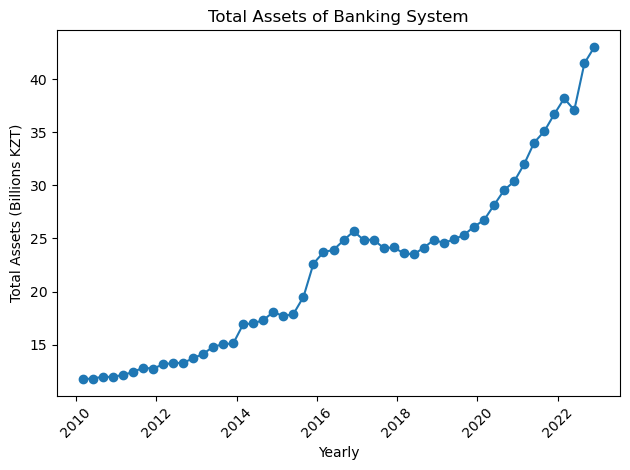

In [39]:
# Creating line chart of banking statistics
filtered_bank_stats = filtered_bank_stats.copy()
filtered_bank_stats['Value (Billion)'] = filtered_bank_stats['Value'] / 1000000000

plt.plot(filtered_bank_stats['Date'], filtered_bank_stats['Value (Billion)'], marker='o')
plt.xlabel('Yearly')
plt.ylabel('Total Assets (Billions KZT)')
plt.title('Total Assets of Banking System')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Findings:
The statistical data for Total Assets of banking system of Kazakhstan tends to increase annually.

### 1.2. Historical Data on Operational Risk Losses

In [40]:
# Downloading historical data for Operational Risk Losses type 1.
filepath1 = 'C:/Users/user/Documents/R studio/file1.xlsx'
or_loss_type1 = pd.read_excel(filepath1)
or_loss_type1.head(5)

,Loss,Period,Date
0,1877,1,2016-12-31
1,1807,1,2016-12-30
2,918,1,2016-12-30
3,1480,1,2016-12-29
4,1218,1,2016-12-27


In [41]:
# Checking dataframe for datatypes and size.
or_loss_type1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss    1965 non-null   int64         
 1   Period  1965 non-null   int64         
 2   Date    1965 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 46.2 KB


Text(0.5, 1.0, 'Operational loss type 1')

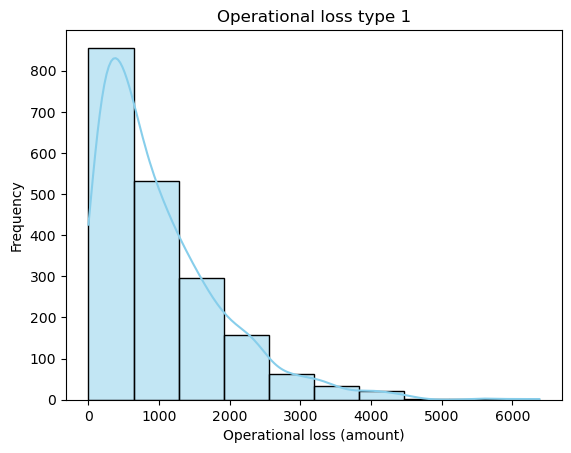

In [42]:
# Histogram of distribution of Operational Risk Losses type 1
sns.histplot(or_loss_type1['Loss'], bins = 10, color = 'skyblue', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 1')

In [43]:
# Checking for null values
or_loss_type1.isna().sum()

Loss      0
Period    0
Date      0
dtype: int64

In [44]:
# Checking for duplicated values
or_loss_type1.duplicated().sum()

0

In [45]:
# Downloading historical data for Operational Risk Losses type 2.
filepath2 = 'C:/Users/user/Documents/R studio/file2.xlsx'
or_loss_type2 = pd.read_excel(filepath2)
or_loss_type2.head(5)

,Loss,Period,Date
0,181,1,2016-12-31
1,610,1,2016-12-23
2,961,1,2016-12-19
3,1312,1,2016-12-19
4,259,1,2016-12-14


In [46]:
# Checking dataframe for datatypes and size.
or_loss_type2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss    2025 non-null   int64         
 1   Period  2025 non-null   int64         
 2   Date    2025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 47.6 KB


Text(0.5, 1.0, 'Operational loss type 2')

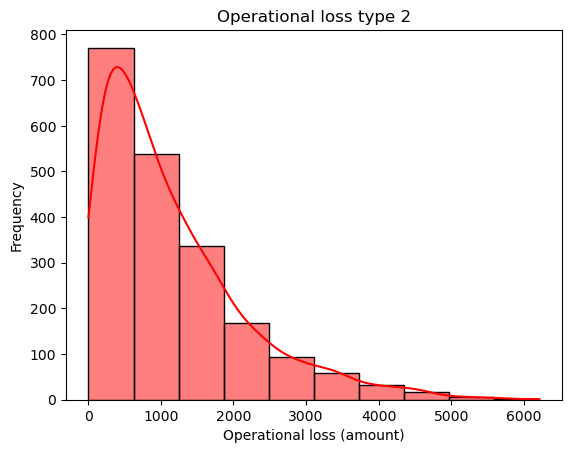

In [47]:
# Histogram of distribution of Operational Risk Losses type 2
sns.histplot(or_loss_type2['Loss'], bins = 10, color = 'red', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 2')

In [48]:
# Checking for null values
or_loss_type2.isna().sum()

Loss      0
Period    0
Date      0
dtype: int64

In [49]:
# Checking for duplicated values
or_loss_type2.duplicated().sum()

0

In [50]:
# Downloading historical data for Operational Risk Losses type 3.
filepath3 = 'C:/Users/user/Documents/R studio/file3.xlsx'
or_loss_type3 = pd.read_excel(filepath3)
or_loss_type3.head(5)

,Loss,Period,Date
0,1334,1,2016-12-31
1,1067,1,2016-12-30
2,1068,1,2016-12-29
3,714,1,2016-12-26
4,1590,1,2016-12-26


In [51]:
# Checking dataframe for datatypes and size.
or_loss_type3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss    1995 non-null   int64         
 1   Period  1995 non-null   int64         
 2   Date    1995 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 46.9 KB


Text(0.5, 1.0, 'Operational loss type 3')

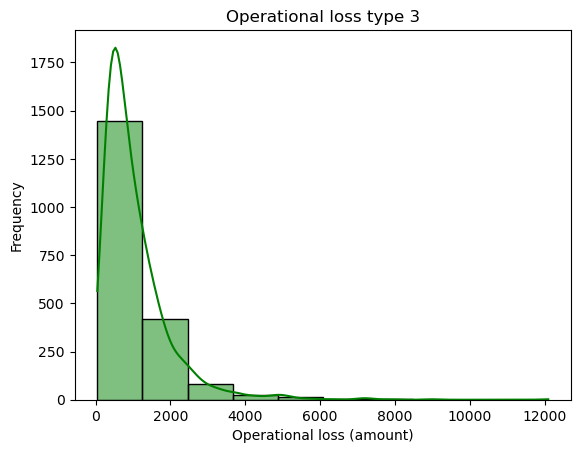

In [52]:
# Histogram of distribution of Operational Risk Losses type 3
sns.histplot(or_loss_type3['Loss'], bins = 10, color = 'green', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 3')

In [53]:
# Checking for null values
or_loss_type3.isna().sum()

Loss      0
Period    0
Date      0
dtype: int64

In [54]:
# Checking for duplicated values
or_loss_type3.duplicated().sum()

0

In [55]:
# Downloading historical data for Operational Risk Losses type 4.
filepath4 = 'C:/Users/user/Documents/R studio/file4.xlsx'
or_loss_type4 = pd.read_excel(filepath4)
or_loss_type4.head(5)

,Loss,Period,Date
0,650,1,2016-12-31
1,847,1,2016-12-30
2,242,1,2016-12-11
3,513,1,2016-12-09
4,264,1,2016-12-07


In [56]:
# Checking dataframe for datatypes and size.
or_loss_type4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss    1941 non-null   int64         
 1   Period  1941 non-null   int64         
 2   Date    1941 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 45.6 KB


Text(0.5, 1.0, 'Operational loss type 4')

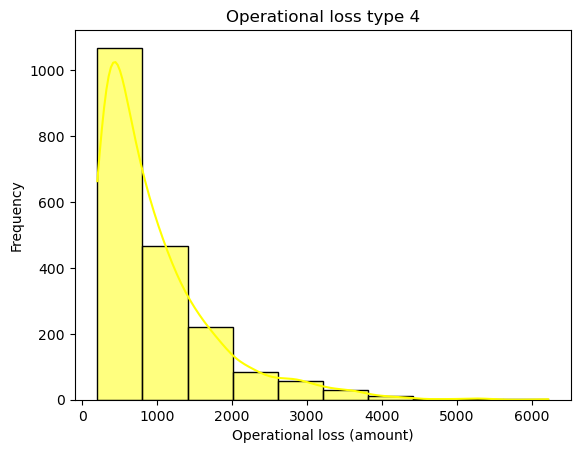

In [57]:
# Histogram of distribution of Operational Risk Losses type 4
sns.histplot(or_loss_type4['Loss'], bins = 10, color = 'yellow', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 4')

In [58]:
# Checking for null values
or_loss_type4.isna().sum()

Loss      0
Period    0
Date      0
dtype: int64

In [59]:
# Checking for duplicated values
or_loss_type4.duplicated().sum()

0

### Findings:
There are no any null or duplicated values in Operational Risk dataframes by types.

In [60]:
# Extract 'Year' and 'Month' from the 'Date' column
or_loss_type1['Year'] = or_loss_type1['Date'].dt.year
or_loss_type1['Month'] = or_loss_type1['Date'].dt.month

# Group by 'Year' and 'Month', summing the 'Loss' column
or_loss_type1_monthly = or_loss_type1.groupby(['Year', 'Month'])['Loss'].sum().reset_index()
print(or_loss_type1_monthly.head(5))
print(or_loss_type1_monthly.tail(5))

   Year  Month   Loss
0  2007      1  14427
1  2007      2  22560
2  2007      3  20051
3  2007      4  15088
4  2007      5  23341
     Year  Month   Loss
115  2016      8  16277
116  2016      9  17572
117  2016     10  11685
118  2016     11  12203
119  2016     12  11586


In [61]:
# Checking dataframe for datatypes and size.
or_loss_type1_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    120 non-null    int64
 1   Month   120 non-null    int64
 2   Loss    120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


In [62]:
# Create 'Date' column by combining 'Year' and 'Month' and dropping them.
or_loss_type1_monthly['Date'] = pd.to_datetime(or_loss_type1_monthly[['Year', 'Month']].assign(day = 1))
or_loss_type1_monthly.drop(['Year', 'Month'], axis = 1, inplace = True)
or_loss_type1_monthly.head()

,Loss,Date
0,14427,2007-01-01
1,22560,2007-02-01
2,20051,2007-03-01
3,15088,2007-04-01
4,23341,2007-05-01


In [63]:
# Renaming columns
or_loss_type1_monthly.rename(columns = {'Loss': 'Loss_1'}, inplace = True)
or_loss_type1_monthly.head(3)

,Loss_1,Date
0,14427,2007-01-01
1,22560,2007-02-01
2,20051,2007-03-01


In [64]:
# Extracting 'Year' and 'Month' from the 'Date' column
or_loss_type2['Year'] = or_loss_type2['Date'].dt.year
or_loss_type2['Month'] = or_loss_type2['Date'].dt.month

# Grouping by 'Year' and 'Month', summing the 'Loss' column
or_loss_type2_monthly = or_loss_type2.groupby(['Year', 'Month'])['Loss'].sum().reset_index()
print(or_loss_type2_monthly.head(5))
print(or_loss_type2_monthly.tail(5))

   Year  Month   Loss
0  2007      1  14651
1  2007      2  18163
2  2007      3  22846
3  2007      4  15445
4  2007      5  10851
     Year  Month   Loss
115  2016      8  25194
116  2016      9  16288
117  2016     10  13334
118  2016     11  27445
119  2016     12   5016


In [65]:
# Checking dataframe for datatypes and size.
or_loss_type2_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    120 non-null    int64
 1   Month   120 non-null    int64
 2   Loss    120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


In [66]:
# Create 'Date' column by combining 'Year' and 'Month' and dropping them.
or_loss_type2_monthly['Date'] = pd.to_datetime(or_loss_type2_monthly[['Year', 'Month']].assign(day = 1))
or_loss_type2_monthly.drop(['Year', 'Month'], axis = 1, inplace = True)
or_loss_type2_monthly.head()

,Loss,Date
0,14651,2007-01-01
1,18163,2007-02-01
2,22846,2007-03-01
3,15445,2007-04-01
4,10851,2007-05-01


In [67]:
# Renaming columns
or_loss_type2_monthly.rename(columns = {'Loss': 'Loss_2', 'Date': 'Date_2'}, inplace = True)
or_loss_type2_monthly.head(3)

,Loss_2,Date_2
0,14651,2007-01-01
1,18163,2007-02-01
2,22846,2007-03-01


In [68]:
# Extract 'Year' and 'Month' from the 'Date' column
or_loss_type3['Year'] = or_loss_type3['Date'].dt.year
or_loss_type3['Month'] = or_loss_type3['Date'].dt.month

# Group by 'Year' and 'Month', summing the 'Loss' column
or_loss_type3_monthly = or_loss_type3.groupby(['Year', 'Month'])['Loss'].sum().reset_index()
print(or_loss_type3_monthly.head(5))
print(or_loss_type3_monthly.tail(5))

   Year  Month   Loss
0  2007      1   9900
1  2007      2  11048
2  2007      3  14592
3  2007      4  26741
4  2007      5  18393
     Year  Month   Loss
115  2016      8  12163
116  2016      9  11690
117  2016     10  28191
118  2016     11  18698
119  2016     12  29117


In [69]:
# Checking dataframe for datatypes and size.
or_loss_type3_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    120 non-null    int64
 1   Month   120 non-null    int64
 2   Loss    120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


In [70]:
# Create 'Date' column by combining 'Year' and 'Month' and dropping them.
or_loss_type3_monthly['Date'] = pd.to_datetime(or_loss_type3_monthly[['Year', 'Month']].assign(day = 1))
or_loss_type3_monthly.drop(['Year', 'Month'], axis = 1, inplace = True)
or_loss_type3_monthly.head()

,Loss,Date
0,9900,2007-01-01
1,11048,2007-02-01
2,14592,2007-03-01
3,26741,2007-04-01
4,18393,2007-05-01


In [71]:
# Renaming columns
or_loss_type3_monthly.rename(columns = {'Loss': 'Loss_3', 'Date': 'Date_3'}, inplace = True)
or_loss_type3_monthly.head(3)

,Loss_3,Date_3
0,9900,2007-01-01
1,11048,2007-02-01
2,14592,2007-03-01


In [72]:
# Extract 'Year' and 'Month' from the 'Date' column
or_loss_type4['Year'] = or_loss_type4['Date'].dt.year
or_loss_type4['Month'] = or_loss_type4['Date'].dt.month

# Group by 'Year' and 'Month', summing the 'Loss' column
or_loss_type4_monthly = or_loss_type4.groupby(['Year', 'Month'])['Loss'].sum().reset_index()
print(or_loss_type4_monthly.head(5))
print(or_loss_type4_monthly.tail(5))

   Year  Month   Loss
0  2007      1  16754
1  2007      2  10496
2  2007      3  15874
3  2007      4  11037
4  2007      5   9958
     Year  Month   Loss
115  2016      8  20134
116  2016      9  14013
117  2016     10  11467
118  2016     11  14878
119  2016     12   5381


In [73]:
# Checking dataframe for datatypes and size.
or_loss_type4_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    120 non-null    int64
 1   Month   120 non-null    int64
 2   Loss    120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


In [74]:
# Create 'Date' column by combining 'Year' and 'Month' and dropping them.
or_loss_type4_monthly['Date'] = pd.to_datetime(or_loss_type4_monthly[['Year', 'Month']].assign(day = 1))
or_loss_type4_monthly.drop(['Year', 'Month'], axis = 1, inplace = True)
or_loss_type4_monthly.head()

,Loss,Date
0,16754,2007-01-01
1,10496,2007-02-01
2,15874,2007-03-01
3,11037,2007-04-01
4,9958,2007-05-01


In [75]:
# Renaming columns
or_loss_type4_monthly.rename(columns = {'Loss': 'Loss_4', 'Date': 'Date_4'}, inplace = True)
or_loss_type4_monthly.head(3)

,Loss_4,Date_4
0,16754,2007-01-01
1,10496,2007-02-01
2,15874,2007-03-01


In [76]:
# Creating combined dataframe on Operationa Risk Losses
combined_or_losses = pd.concat([or_loss_type1_monthly, or_loss_type2_monthly, or_loss_type3_monthly, or_loss_type4_monthly], axis =1)
combined_or_losses.head()

,Loss_1,Date,Loss_2,Date_2,Loss_3,Date_3,Loss_4,Date_4
0,14427,2007-01-01,14651,2007-01-01,9900,2007-01-01,16754,2007-01-01
1,22560,2007-02-01,18163,2007-02-01,11048,2007-02-01,10496,2007-02-01
2,20051,2007-03-01,22846,2007-03-01,14592,2007-03-01,15874,2007-03-01
3,15088,2007-04-01,15445,2007-04-01,26741,2007-04-01,11037,2007-04-01
4,23341,2007-05-01,10851,2007-05-01,18393,2007-05-01,9958,2007-05-01


In [77]:
# Droping unnecessary columns and creating "Total_losses" columns
combined_or_losses.drop(['Date_2', 'Date_3', 'Date_4'], axis = 1, inplace = True)
combined_or_losses['Total_losses'] = combined_or_losses.sum(axis = 1)
combined_or_losses.head()

C:\TEMP\ipykernel_2816\2225718853.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_or_losses['Total_losses'] = combined_or_losses.sum(axis = 1)


,Loss_1,Date,Loss_2,Loss_3,Loss_4,Total_losses
0,14427,2007-01-01,14651,9900,16754,55732
1,22560,2007-02-01,18163,11048,10496,62267
2,20051,2007-03-01,22846,14592,15874,73363
3,15088,2007-04-01,15445,26741,11037,68311
4,23341,2007-05-01,10851,18393,9958,62543


In [78]:
# Changing positions of columns in the dataframe 
combined_or_losses = combined_or_losses[['Date', 'Total_losses', 'Loss_1', 'Loss_2', 'Loss_3', 'Loss_4']]
combined_or_losses.head(5)

,Date,Total_losses,Loss_1,Loss_2,Loss_3,Loss_4
0,2007-01-01,55732,14427,14651,9900,16754
1,2007-02-01,62267,22560,18163,11048,10496
2,2007-03-01,73363,20051,22846,14592,15874
3,2007-04-01,68311,15088,15445,26741,11037
4,2007-05-01,62543,23341,10851,18393,9958


In [79]:
# Filtering dataframe to include only data for 3, 6, 9 and 12 months or 1st, 2nd, 3rd and 4th Quarters. 
filtered_or_losses = combined_or_losses[(combined_or_losses['Date'].dt.month.isin([3, 6, 9, 12])) & (combined_or_losses['Date'].dt.year <= 2022)]
filtered_or_losses.head(12)

,Date,Total_losses,Loss_1,Loss_2,Loss_3,Loss_4
2,2007-03-01,73363,20051,22846,14592,15874
5,2007-06-01,55575,13526,12879,15014,14156
8,2007-09-01,51576,15110,13494,13845,9127
11,2007-12-01,76181,15351,4717,34355,21758
14,2008-03-01,78714,12304,27642,24060,14708
17,2008-06-01,61718,16117,35270,4661,5670
20,2008-09-01,44665,6783,13845,12730,11307
23,2008-12-01,58535,16430,23037,8804,10264
26,2009-03-01,66176,14599,31260,8426,11891
29,2009-06-01,61546,11375,7048,16414,26709


In [80]:
# Checking tail of the dataframe
filtered_or_losses.tail(5)

,Date,Total_losses,Loss_1,Loss_2,Loss_3,Loss_4
107,2015-12-01,61689,23735,10561,15303,12090
110,2016-03-01,72931,17992,15389,29999,9551
113,2016-06-01,92570,16560,14594,39523,21893
116,2016-09-01,59563,17572,16288,11690,14013
119,2016-12-01,51100,11586,5016,29117,5381


Text(0.5, 1.0, 'Distribution of Total Operational Risk Losses')

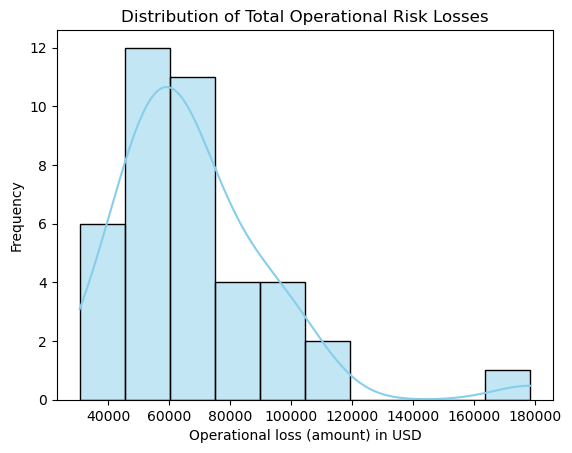

In [81]:
# Histogram of distribution of Operational Risk Losses type 1
sns.histplot(filtered_or_losses['Total_losses'], bins = 10, color = 'skyblue', kde = True)
plt.xlabel('Operational loss (amount) in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Total Operational Risk Losses')

In [82]:
# Getting statistical information about the dataframe on Operational Risk Losses
filtered_or_losses.describe()

,Total_losses,Loss_1,Loss_2,Loss_3,Loss_4
count,40.000000,40.00000,40.000000,40.000000,40.000000
mean,68346.450000,16259.55000,20000.800000,17043.450000,15042.650000
std,25856.900728,5027.26193,20575.074372,10335.467674,8611.985877
min,30608.000000,5877.00000,3882.000000,4383.000000,3590.000000
25%,54334.500000,12525.25000,10528.500000,8336.000000,9044.000000
50%,61617.500000,16471.50000,13669.500000,14803.000000,13923.500000
75%,76814.250000,19610.25000,22225.750000,23803.500000,18426.000000
max,178362.000000,27535.00000,123190.000000,43651.000000,38239.000000


### Findings:
The data on Operational Risk Losses are not normally distributed and has essential outliers, which is confirmed as the mean and median values of losses are not close to each other.

### 1.3. Macroeconomic statstics of Kazakhstan.

In [83]:
# Downloading macroeconomic statistics of Kazakhstan.
filepath = 'C:/Users/user/Documents/Imir/My Data Analysis Projects/Data/macrokz.csv'
df_macrokz = pd.read_csv(filepath)
df_macrokz.head(5)

,Unnamed: 0,Year_Quarter,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,...,cred_portfolio,coef_k1,coef_k3,provisions,percent_margin,com_inc,com_exp,oper_inc,oth_inc,DR
0,1,2010-Q1,2434.9,137.1,403.2,244.9,43.0,274.2,287.8,210.9,...,193.00,0.31,0.03,83.91,0.06,1125517.36,175988.45,3211104.05,411132.7,0.02
1,2,2010-Q2,2506.4,139.7,406.1,273.0,42.8,273.9,309.8,206.1,...,183.28,0.32,0.06,74.55,0.06,1509069.76,191369.75,3776480.95,369998.2,0.02
2,3,2010-Q3,2512.3,116.7,349.5,242.1,43.3,285.0,319.6,247.9,...,243.65,0.43,0.25,86.63,0.06,1811025.26,219077.65,3417365.05,361438.0,0.02
3,4,2010-Q4,2816.4,125.2,456.9,279.4,44.1,287.0,349.4,305.4,...,232.46,0.33,0.04,80.06,0.06,2059290.86,178291.85,3913204.35,390177.7,0.02
4,5,2011-Q1,2588.7,135.5,410.9,260.1,44.4,274.9,319.9,219.2,...,234.03,0.32,0.04,78.81,0.06,1784063.16,239975.45,4062113.55,411328.5,0.03


In [84]:
# Checking tail of dataframe
df_macrokz.tail(5)

,Unnamed: 0,Year_Quarter,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,...,cred_portfolio,coef_k1,coef_k3,provisions,percent_margin,com_inc,com_exp,oper_inc,oth_inc,DR
47,48,2021-Q4,4338.7,216.6,496.9,442.4,48.4,526.7,638.1,425.4,...,918.20,0.39,0.05,63.95,0.05,74562995.83,4563366.30,21731455.33,1530659.47,0.05
48,49,2022-Q1,3588.5,158.0,440.4,387.0,48.7,470.8,528.2,287.3,...,904.24,0.60,0.48,69.12,0.06,73590762.04,4894401.58,23450458.36,1661117.26,0.05
49,50,2022-Q2,3733.2,158.7,431.1,372.3,60.9,542.6,526.5,272.4,...,1010.02,0.43,0.05,70.34,0.06,77384487.14,5019702.93,23904600.87,1683725.41,0.05
50,51,2022-Q3,3663.6,185.2,349.2,302.5,54.7,504.0,585.8,337.9,...,1111.02,0.47,0.06,77.37,0.06,85122935.85,5521673.23,26295060.95,1852097.95,0.05
51,52,2022-Q4,4537.4,244.7,495.7,441.3,47.5,633.4,675.3,430.5,...,1222.12,0.52,0.06,85.11,0.07,93635229.43,6073840.55,28924567.05,2037307.75,0.06


In [85]:
# Dropping unnecessary macroeconomic variables on securities market and default rate
df_macrokz.drop(columns = ['Unnamed: 0', 'ntrade_Con', 'govsec_rate_kzt_1y', 'govsec_rate_kzt_7y', 'rate_kzt_mort_1y_iy', 'rate_kzt_mort_0y_1y', 'ntrade_Trd', 'ntrade_Agr', 'DR'], axis =1, inplace = True)
df_macrokz.head(5)

,Year_Quarter,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,GDD_Inf_R,...,realest_resed_sec_rus,cred_portfolio,coef_k1,coef_k3,provisions,percent_margin,com_inc,com_exp,oper_inc,oth_inc
0,2010-Q1,2434.9,137.1,403.2,244.9,43.0,274.2,287.8,210.9,94.0,...,101.0,193.00,0.31,0.03,83.91,0.06,1125517.36,175988.45,3211104.05,411132.7
1,2010-Q2,2506.4,139.7,406.1,273.0,42.8,273.9,309.8,206.1,97.5,...,100.3,183.28,0.32,0.06,74.55,0.06,1509069.76,191369.75,3776480.95,369998.2
2,2010-Q3,2512.3,116.7,349.5,242.1,43.3,285.0,319.6,247.9,86.6,...,100.4,243.65,0.43,0.25,86.63,0.06,1811025.26,219077.65,3417365.05,361438.0
3,2010-Q4,2816.4,125.2,456.9,279.4,44.1,287.0,349.4,305.4,143.7,...,100.9,232.46,0.33,0.04,80.06,0.06,2059290.86,178291.85,3913204.35,390177.7
4,2011-Q1,2588.7,135.5,410.9,260.1,44.4,274.9,319.9,219.2,108.6,...,101.3,234.03,0.32,0.04,78.81,0.06,1784063.16,239975.45,4062113.55,411328.5


In [86]:
# Checking dataframe for datatypes and size
df_macrokz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year_Quarter            52 non-null     object 
 1   real_gdp                52 non-null     float64
 2   GDD_Agr_R               52 non-null     float64
 3   GDD_Min_R               52 non-null     float64
 4   GDD_Man_R               52 non-null     float64
 5   GDD_Elc_R               52 non-null     float64
 6   GDD_Con_R               52 non-null     float64
 7   GDD_Trd_R               52 non-null     float64
 8   GDD_Trn_R               52 non-null     float64
 9   GDD_Inf_R               52 non-null     float64
 10  GDD_Est_R               52 non-null     float64
 11  GDD_R                   52 non-null     float64
 12  Rincpop_q               52 non-null     float64
 13  Rexppop_q               52 non-null     float64
 14  Rwage_q                 52 non-null     floa

In [87]:
# Checking for null values
df_macrokz.isna().sum()

Year_Quarter              0
real_gdp                  0
GDD_Agr_R                 0
GDD_Min_R                 0
GDD_Man_R                 0
GDD_Elc_R                 0
GDD_Con_R                 0
GDD_Trd_R                 0
GDD_Trn_R                 0
GDD_Inf_R                 0
GDD_Est_R                 0
GDD_R                     0
Rincpop_q                 0
Rexppop_q                 0
Rwage_q                   0
imp                       0
exp                       0
usdkzt                    0
eurkzt                    0
rurkzt                    0
poil                      0
GDP_DEF                   0
cpi                       0
realest_resed_prim        0
realest_resed_sec         0
realest_comm              0
index_stock_weighted      0
ntrade_Min                0
ntrade_Man                0
ntrade_Elc                0
ntrade_Trn                0
ntrade_Inf                0
fed_fund_rate             0
govsec_rate_kzt_3m        0
govsec_rate_kzt_10y       0
tonia_rate          

In [88]:
# Checking for duplicated values
df_macrokz.duplicated().sum()

0

### Findings:
There are not any null or duplicated values in dataframe on macroeconomic variables of Kazakhstan.

In [89]:
# Filtering dataframe to include only period for Y2010 - Y2016 
df_macrokz_copy = df_macrokz.loc[(df_macrokz['Year_Quarter'] >= '2010-Q1') & (df_macrokz['Year_Quarter'] <= '2016-Q4')]

In [90]:
# Checking dataframe
df_macrokz_copy.head()

,Year_Quarter,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,GDD_Inf_R,...,realest_resed_sec_rus,cred_portfolio,coef_k1,coef_k3,provisions,percent_margin,com_inc,com_exp,oper_inc,oth_inc
0,2010-Q1,2434.9,137.1,403.2,244.9,43.0,274.2,287.8,210.9,94.0,...,101.0,193.00,0.31,0.03,83.91,0.06,1125517.36,175988.45,3211104.05,411132.7
1,2010-Q2,2506.4,139.7,406.1,273.0,42.8,273.9,309.8,206.1,97.5,...,100.3,183.28,0.32,0.06,74.55,0.06,1509069.76,191369.75,3776480.95,369998.2
2,2010-Q3,2512.3,116.7,349.5,242.1,43.3,285.0,319.6,247.9,86.6,...,100.4,243.65,0.43,0.25,86.63,0.06,1811025.26,219077.65,3417365.05,361438.0
3,2010-Q4,2816.4,125.2,456.9,279.4,44.1,287.0,349.4,305.4,143.7,...,100.9,232.46,0.33,0.04,80.06,0.06,2059290.86,178291.85,3913204.35,390177.7
4,2011-Q1,2588.7,135.5,410.9,260.1,44.4,274.9,319.9,219.2,108.6,...,101.3,234.03,0.32,0.04,78.81,0.06,1784063.16,239975.45,4062113.55,411328.5


In [91]:
# Checking tail of datarame
df_macrokz_copy.tail()

,Year_Quarter,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,GDD_Inf_R,...,realest_resed_sec_rus,cred_portfolio,coef_k1,coef_k3,provisions,percent_margin,com_inc,com_exp,oper_inc,oth_inc
23,2015-Q4,3561.2,184.1,440.4,328.7,50.5,347.8,501.4,413.1,318.3,...,98.3,444.39,0.30,0.04,52.98,0.06,26117137.86,1094862.45,11963387.15,1595414.7
24,2016-Q1,3059.0,138.6,411.7,276.8,45.6,286.9,439.1,294.6,150.8,...,99.5,446.26,0.33,0.04,50.51,0.06,26723519.46,913089.65,11898493.75,1552554.3
25,2016-Q2,3223.2,138.4,390.4,300.7,47.6,343.8,466.0,290.0,137.9,...,99.0,450.46,0.37,0.03,51.56,0.06,26455285.56,1163709.25,11786904.25,1729624.6
26,2016-Q3,3099.8,164.0,295.7,254.3,47.4,372.3,483.5,337.9,125.5,...,99.0,455.60,0.49,0.33,53.09,0.06,26721196.26,1284186.75,11302902.05,701928.7
27,2016-Q4,3681.3,196.7,452.3,343.5,51.1,377.1,506.5,422.3,339.3,...,99.5,410.68,0.40,0.03,47.14,0.06,27878091.56,1826890.45,12130778.55,746191.6


In [92]:
# Checking banking statistics dataframe for included time periods
print(filtered_bank_stats.head(5))
print(filtered_bank_stats.tail(5))

         Date        Value  Value (Billion)
2  2010-03-01  11745157648        11.745158
5  2010-06-01  11798222139        11.798222
8  2010-09-01  11967446695        11.967447
11 2010-12-01  11948931990        11.948932
14 2011-03-01  12143383204        12.143383
          Date        Value  Value (Billion)
143 2021-12-01  36722940854        36.722941
146 2022-03-01  38199805232        38.199805
149 2022-06-01  37102607579        37.102608
152 2022-09-01  41517474374        41.517474
155 2022-12-01  43056712145        43.056712


In [93]:
# Checking Operational Risk Losses dataframe for included time periods
print(filtered_or_losses.head(5))
print(filtered_or_losses.tail(5))

         Date  Total_losses  Loss_1  Loss_2  Loss_3  Loss_4
2  2007-03-01         73363   20051   22846   14592   15874
5  2007-06-01         55575   13526   12879   15014   14156
8  2007-09-01         51576   15110   13494   13845    9127
11 2007-12-01         76181   15351    4717   34355   21758
14 2008-03-01         78714   12304   27642   24060   14708
          Date  Total_losses  Loss_1  Loss_2  Loss_3  Loss_4
107 2015-12-01         61689   23735   10561   15303   12090
110 2016-03-01         72931   17992   15389   29999    9551
113 2016-06-01         92570   16560   14594   39523   21893
116 2016-09-01         59563   17572   16288   11690   14013
119 2016-12-01         51100   11586    5016   29117    5381


In [94]:
# Filtering dataframe to include only period for Y2010 - Y2016 
filtered_bank_stats = filtered_bank_stats[(filtered_bank_stats['Date'] >= '2010-03-01') & (filtered_bank_stats['Date'] <= '2016-12-01')]
print(filtered_bank_stats.head(6))
print(filtered_bank_stats.tail(6))

         Date        Value  Value (Billion)
2  2010-03-01  11745157648        11.745158
5  2010-06-01  11798222139        11.798222
8  2010-09-01  11967446695        11.967447
11 2010-12-01  11948931990        11.948932
14 2011-03-01  12143383204        12.143383
17 2011-06-01  12392684550        12.392685
         Date        Value  Value (Billion)
68 2015-09-01  19496812870        19.496813
71 2015-12-01  22633495176        22.633495
74 2016-03-01  23705824434        23.705824
77 2016-06-01  23932972758        23.932973
80 2016-09-01  24832900235        24.832900
83 2016-12-01  25681510627        25.681511


In [95]:
# Filtering dataframe to include only period for Y2010 - Y2016 
filtered_or_losses = filtered_or_losses[(filtered_or_losses['Date'] >= '2010-03-01') & (filtered_or_losses['Date'] <= '2016-12-01')]
filtered_or_losses.rename(columns = {'Date': 'Date 2'}, inplace = True)
print(filtered_or_losses.head(6))
print(filtered_or_losses.tail(6))

       Date 2  Total_losses  Loss_1  Loss_2  Loss_3  Loss_4
38 2010-03-01        105071   21095   22019   23718   38239
41 2010-06-01         55254   19467   15758   11282    8747
44 2010-09-01         56211   23084   10578    7383   15166
47 2010-12-01         60807   27535    9363    8066   15843
50 2011-03-01         41388   16513   11560    7586    5729
53 2011-06-01         48339   19289    8224   13525    7301
        Date 2  Total_losses  Loss_1  Loss_2  Loss_3  Loss_4
104 2015-09-01         92722   11111   19767   43651   18193
107 2015-12-01         61689   23735   10561   15303   12090
110 2016-03-01         72931   17992   15389   29999    9551
113 2016-06-01         92570   16560   14594   39523   21893
116 2016-09-01         59563   17572   16288   11690   14013
119 2016-12-01         51100   11586    5016   29117    5381


In [96]:
# Converting "Total_losses" from USD to KZT
usd_kzt_exchange_rates = {
2016: 342.16,
2015:221.73,
2014: 179.19,
2013: 152.13,
2012: 149.11,
2011: 146.62,
2010: 147.35
}

for index, row in filtered_or_losses.iterrows():
    year = row['Date 2'].year
    exchange_rate = usd_kzt_exchange_rates.get(year)
    if exchange_rate:
        filtered_or_losses.at[index, 'Total_losses_KZT'] = row['Total_losses'] * exchange_rate
filtered_or_losses.head()

,Date 2,Total_losses,Loss_1,Loss_2,Loss_3,Loss_4,Total_losses_KZT
38,2010-03-01,105071,21095,22019,23718,38239,15482211.85
41,2010-06-01,55254,19467,15758,11282,8747,8141676.90
44,2010-09-01,56211,23084,10578,7383,15166,8282690.85
47,2010-12-01,60807,27535,9363,8066,15843,8959911.45
50,2011-03-01,41388,16513,11560,7586,5729,6068308.56


In [97]:
# Creating dataframe "Superbank"
superbank = pd.merge(filtered_bank_stats, filtered_or_losses, left_on='Date', right_on='Date 2', how='outer')
superbank.head()

,Date,Value,Value (Billion),Date 2,Total_losses,Loss_1,Loss_2,Loss_3,Loss_4,Total_losses_KZT
0,2010-03-01,11745157648,11.745158,2010-03-01,105071,21095,22019,23718,38239,15482211.85
1,2010-06-01,11798222139,11.798222,2010-06-01,55254,19467,15758,11282,8747,8141676.90
2,2010-09-01,11967446695,11.967447,2010-09-01,56211,23084,10578,7383,15166,8282690.85
3,2010-12-01,11948931990,11.948932,2010-12-01,60807,27535,9363,8066,15843,8959911.45
4,2011-03-01,12143383204,12.143383,2011-03-01,41388,16513,11560,7586,5729,6068308.56


Text(0.5, 1.0, 'Distribution of Total Operational Risk Losses')

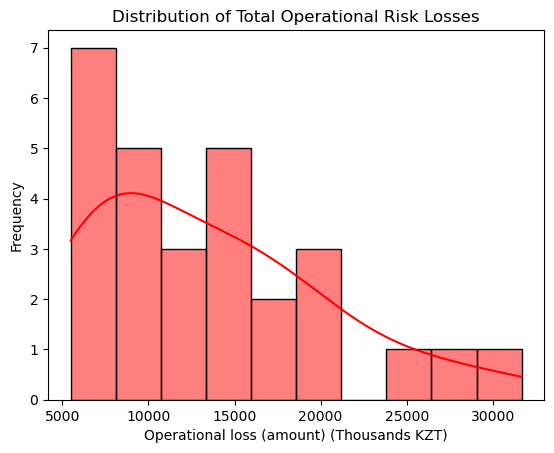

In [98]:
# Histogram of distribution of Operational Risk Losses
sns.histplot(superbank['Total_losses_KZT']/1000, bins = 10, color = 'red', kde = True)
plt.xlabel('Operational loss (amount) (Thousands KZT)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Operational Risk Losses')

In [99]:
# Checking dataframe
superbank.shape

(28, 10)

In [100]:
# Renaming columns of datarame
superbank.rename(columns = {'Value': 'Total_assets'}, inplace = True)

In [101]:
# Calculating share of Operational Risk Losses in Total Assets
superbank['Loss_in_assets'] = superbank['Total_losses_KZT'] / superbank['Total_assets']
superbank.drop(columns = ['Date 2'], inplace = True)
superbank.head()

,Date,Total_assets,Value (Billion),Total_losses,Loss_1,Loss_2,Loss_3,Loss_4,Total_losses_KZT,Loss_in_assets
0,2010-03-01,11745157648,11.745158,105071,21095,22019,23718,38239,15482211.85,0.001318
1,2010-06-01,11798222139,11.798222,55254,19467,15758,11282,8747,8141676.90,0.000690
2,2010-09-01,11967446695,11.967447,56211,23084,10578,7383,15166,8282690.85,0.000692
3,2010-12-01,11948931990,11.948932,60807,27535,9363,8066,15843,8959911.45,0.000750
4,2011-03-01,12143383204,12.143383,41388,16513,11560,7586,5729,6068308.56,0.000500


In [102]:
# Checking for null values
superbank.isna().sum()

Date                0
Total_assets        0
Value (Billion)     0
Total_losses        0
Loss_1              0
Loss_2              0
Loss_3              0
Loss_4              0
Total_losses_KZT    0
Loss_in_assets      0
dtype: int64

In [103]:
# Checking for duplicated values
superbank.duplicated().sum()

0

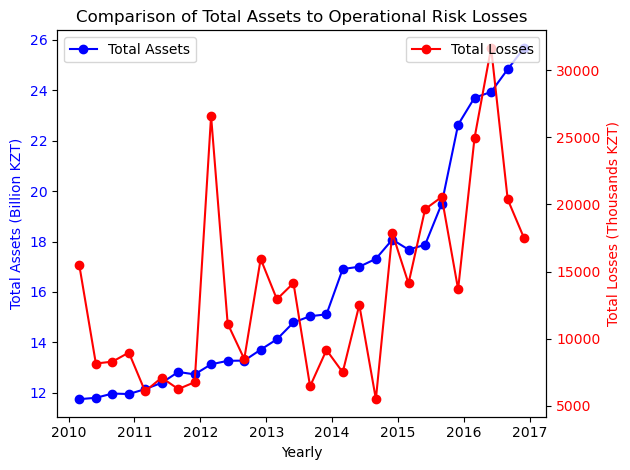

In [104]:
# Creating line chart of banking statistics

fig, ax1 = plt.subplots()

ax1.plot(superbank['Date'], superbank['Value (Billion)'], marker='o', label='Total Assets', color='blue')
ax1.set_xlabel('Yearly')
ax1.set_ylabel('Total Assets (Billion KZT)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.plot(superbank['Date'], superbank['Total_losses_KZT']/1000, marker='o', label='Total Losses', color='red')
ax2.set_ylabel('Total Losses (Thousands KZT)', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.title('Comparison of Total Assets to Operational Risk Losses')
plt.xticks(rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Findings:
Despite the rapid fluctuations of Operational Risk Losses there is increasing tendency for the last years from 2015. 

In [105]:
# Checking for null values
df_macrokz_copy.isna().sum()

Year_Quarter              0
real_gdp                  0
GDD_Agr_R                 0
GDD_Min_R                 0
GDD_Man_R                 0
GDD_Elc_R                 0
GDD_Con_R                 0
GDD_Trd_R                 0
GDD_Trn_R                 0
GDD_Inf_R                 0
GDD_Est_R                 0
GDD_R                     0
Rincpop_q                 0
Rexppop_q                 0
Rwage_q                   0
imp                       0
exp                       0
usdkzt                    0
eurkzt                    0
rurkzt                    0
poil                      0
GDP_DEF                   0
cpi                       0
realest_resed_prim        0
realest_resed_sec         0
realest_comm              0
index_stock_weighted      0
ntrade_Min                0
ntrade_Man                0
ntrade_Elc                0
ntrade_Trn                0
ntrade_Inf                0
fed_fund_rate             0
govsec_rate_kzt_3m        0
govsec_rate_kzt_10y       0
tonia_rate          

In [106]:
# Calculating the percent change of macroeconomic variables
df_macrokz_copy.drop(['Year_Quarter'], axis=1, inplace=True)
df_macrokz_pct = df_macrokz_copy.pct_change()
df_macrokz_pct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   real_gdp                27 non-null     float64
 1   GDD_Agr_R               27 non-null     float64
 2   GDD_Min_R               27 non-null     float64
 3   GDD_Man_R               27 non-null     float64
 4   GDD_Elc_R               27 non-null     float64
 5   GDD_Con_R               27 non-null     float64
 6   GDD_Trd_R               27 non-null     float64
 7   GDD_Trn_R               27 non-null     float64
 8   GDD_Inf_R               27 non-null     float64
 9   GDD_Est_R               27 non-null     float64
 10  GDD_R                   27 non-null     float64
 11  Rincpop_q               27 non-null     float64
 12  Rexppop_q               27 non-null     float64
 13  Rwage_q                 27 non-null     float64
 14  imp                     27 non-null     floa

C:\TEMP\ipykernel_2816\47706081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_macrokz_copy.drop(['Year_Quarter'], axis=1, inplace=True)


In [107]:
# Checking the dataframe of macroeconomic variables
df_macrokz_pct.head()

,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,GDD_Inf_R,GDD_Est_R,...,realest_resed_sec_rus,cred_portfolio,coef_k1,coef_k3,provisions,percent_margin,com_inc,com_exp,oper_inc,oth_inc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.029365,0.018964,0.007192,0.114741,-0.004651,-0.001094,0.076442,-0.022760,0.037234,-0.106287,...,-0.006931,-0.050363,0.032258,1.000000,-0.111548,0.0,0.340779,0.087399,0.176069,-0.100052
2,0.002354,-0.164639,-0.139375,-0.113187,0.011682,0.040526,0.031633,0.202814,-0.111795,0.034919,...,0.000997,0.329387,0.343750,3.166667,0.162039,0.0,0.200094,0.144787,-0.095093,-0.023136
3,0.121044,0.072836,0.307296,0.154069,0.018476,0.007018,0.093242,0.231948,0.659353,0.205379,...,0.004980,-0.045927,-0.232558,-0.840000,-0.075840,0.0,0.137086,-0.186171,0.145094,0.079515
4,-0.080848,0.082268,-0.100678,-0.069077,0.006803,-0.042160,-0.084430,-0.282253,-0.244259,-0.121704,...,0.003964,0.006754,-0.030303,0.000000,-0.015613,0.0,-0.133652,0.345970,0.038053,0.054208


In [108]:
# Checking for null values
df_macrokz_pct.isna().sum()

real_gdp                  1
GDD_Agr_R                 1
GDD_Min_R                 1
GDD_Man_R                 1
GDD_Elc_R                 1
GDD_Con_R                 1
GDD_Trd_R                 1
GDD_Trn_R                 1
GDD_Inf_R                 1
GDD_Est_R                 1
GDD_R                     1
Rincpop_q                 1
Rexppop_q                 1
Rwage_q                   1
imp                       1
exp                       1
usdkzt                    1
eurkzt                    1
rurkzt                    1
poil                      1
GDP_DEF                   1
cpi                       1
realest_resed_prim        1
realest_resed_sec         1
realest_comm              1
index_stock_weighted      1
ntrade_Min                1
ntrade_Man                1
ntrade_Elc                1
ntrade_Trn                1
ntrade_Inf                1
fed_fund_rate             1
govsec_rate_kzt_3m        1
govsec_rate_kzt_10y       1
tonia_rate                1
rate_kzt_corp_0y_1y 

In [109]:
# Checking dataframe
df_macrokz_pct.shape

(28, 52)

In [110]:
# Dropping null values
df_macrokz_drop = df_macrokz_pct.dropna()

# Checking dataframe
print(df_macrokz_drop.shape)

(27, 52)


In [111]:
# Checking dataframe
superbank = superbank.drop(0)
print(superbank.shape)

(27, 10)


In [112]:
# Creating combined dataframe of macroeconomic variables and banking statistics
combined_df = pd.concat([df_macrokz_drop, superbank], axis = 1)
combined_df.head()

,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,GDD_Inf_R,GDD_Est_R,...,Date,Total_assets,Value (Billion),Total_losses,Loss_1,Loss_2,Loss_3,Loss_4,Total_losses_KZT,Loss_in_assets
1,0.029365,0.018964,0.007192,0.114741,-0.004651,-0.001094,0.076442,-0.022760,0.037234,-0.106287,...,2010-06-01,11798222139,11.798222,55254,19467,15758,11282,8747,8141676.90,0.000690
2,0.002354,-0.164639,-0.139375,-0.113187,0.011682,0.040526,0.031633,0.202814,-0.111795,0.034919,...,2010-09-01,11967446695,11.967447,56211,23084,10578,7383,15166,8282690.85,0.000692
3,0.121044,0.072836,0.307296,0.154069,0.018476,0.007018,0.093242,0.231948,0.659353,0.205379,...,2010-12-01,11948931990,11.948932,60807,27535,9363,8066,15843,8959911.45,0.000750
4,-0.080848,0.082268,-0.100678,-0.069077,0.006803,-0.042160,-0.084430,-0.282253,-0.244259,-0.121704,...,2011-03-01,12143383204,12.143383,41388,16513,11560,7586,5729,6068308.56,0.000500
5,0.049253,0.014022,-0.006084,0.104960,0.006757,-0.028010,0.076586,-0.032391,-0.016575,-0.100231,...,2011-06-01,12392684550,12.392685,48339,19289,8224,13525,7301,7087464.18,0.000572


In [113]:
# Checking tail of dataframe
combined_df.tail()

,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,GDD_Inf_R,GDD_Est_R,...,Date,Total_assets,Value (Billion),Total_losses,Loss_1,Loss_2,Loss_3,Loss_4,Total_losses_KZT,Loss_in_assets
23,0.154846,0.215984,0.380132,0.299209,0.083691,0.000288,0.038740,0.259451,1.454125,0.469234,...,2015-12-01,22633495176,22.633495,61689,23735,10561,15303,12090,13678301.97,0.000604
24,-0.141020,-0.247148,-0.065168,-0.157895,-0.097030,-0.175101,-0.124252,-0.286855,-0.526233,-0.342735,...,2016-03-01,23705824434,23.705824,72931,17992,15389,29999,9551,24954070.96,0.001053
25,0.053678,-0.001443,-0.051737,0.086344,0.043860,0.198327,0.061262,-0.015614,-0.085544,0.002167,...,2016-06-01,23932972758,23.932973,92570,16560,14594,39523,21893,31673751.20,0.001323
26,-0.038285,0.184971,-0.242572,-0.154307,-0.004202,0.082897,0.037554,0.165172,-0.089920,0.054498,...,2016-09-01,24832900235,24.832900,59563,17572,16288,11690,14013,20380076.08,0.000821
27,0.187593,0.199390,0.529591,0.350767,0.078059,0.012893,0.047570,0.249778,1.703586,0.488925,...,2016-12-01,25681510627,25.681511,51100,11586,5016,29117,5381,17484376.00,0.000681


In [114]:
# Creating dataframe for modelling
model_data = combined_df.drop(['Date', 'Total_assets', 'Total_losses', 'Loss_1', 'Loss_2', 'Loss_3', 'Loss_4', 'Total_losses_KZT'], axis = 1)
model_data.head()

,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,GDD_Inf_R,GDD_Est_R,...,coef_k1,coef_k3,provisions,percent_margin,com_inc,com_exp,oper_inc,oth_inc,Value (Billion),Loss_in_assets
1,0.029365,0.018964,0.007192,0.114741,-0.004651,-0.001094,0.076442,-0.022760,0.037234,-0.106287,...,0.032258,1.000000,-0.111548,0.0,0.340779,0.087399,0.176069,-0.100052,11.798222,0.000690
2,0.002354,-0.164639,-0.139375,-0.113187,0.011682,0.040526,0.031633,0.202814,-0.111795,0.034919,...,0.343750,3.166667,0.162039,0.0,0.200094,0.144787,-0.095093,-0.023136,11.967447,0.000692
3,0.121044,0.072836,0.307296,0.154069,0.018476,0.007018,0.093242,0.231948,0.659353,0.205379,...,-0.232558,-0.840000,-0.075840,0.0,0.137086,-0.186171,0.145094,0.079515,11.948932,0.000750
4,-0.080848,0.082268,-0.100678,-0.069077,0.006803,-0.042160,-0.084430,-0.282253,-0.244259,-0.121704,...,-0.030303,0.000000,-0.015613,0.0,-0.133652,0.345970,0.038053,0.054208,12.143383,0.000500
5,0.049253,0.014022,-0.006084,0.104960,0.006757,-0.028010,0.076586,-0.032391,-0.016575,-0.100231,...,0.062500,0.000000,-0.000761,0.0,0.798298,0.265100,0.103520,0.129603,12.392685,0.000572


In [115]:
model_data.tail()

,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,GDD_Inf_R,GDD_Est_R,...,coef_k1,coef_k3,provisions,percent_margin,com_inc,com_exp,oper_inc,oth_inc,Value (Billion),Loss_in_assets
23,0.154846,0.215984,0.380132,0.299209,0.083691,0.000288,0.038740,0.259451,1.454125,0.469234,...,-0.302326,-0.862069,0.048279,0.0,0.042384,0.149437,0.070108,-0.062129,22.633495,0.000604
24,-0.141020,-0.247148,-0.065168,-0.157895,-0.097030,-0.175101,-0.124252,-0.286855,-0.526233,-0.342735,...,0.100000,0.000000,-0.046621,0.0,0.023218,-0.166023,-0.005424,-0.026865,23.705824,0.001053
25,0.053678,-0.001443,-0.051737,0.086344,0.043860,0.198327,0.061262,-0.015614,-0.085544,0.002167,...,0.121212,-0.250000,0.020788,0.0,-0.010037,0.274474,-0.009378,0.114051,23.932973,0.001323
26,-0.038285,0.184971,-0.242572,-0.154307,-0.004202,0.082897,0.037554,0.165172,-0.089920,0.054498,...,0.324324,10.000000,0.029674,0.0,0.010051,0.103529,-0.041063,-0.594173,24.832900,0.000821
27,0.187593,0.199390,0.529591,0.350767,0.078059,0.012893,0.047570,0.249778,1.703586,0.488925,...,-0.183673,-0.909091,-0.112074,0.0,0.043295,0.422605,0.073245,0.063059,25.681511,0.000681


## 2. Statistical Modelling

## 1. Linear Regression (Ordinary Least Squares)

### 2.1. Generation of pairs of independent variables for regression models and calculation of total available pairs of regressors.

In [116]:
# Generation of pairs (2) combinations of independent variables
model_data = pd.DataFrame(model_data)

X = model_data.drop(['Loss_in_assets', 'Value (Billion)'], axis=1)
y = model_data['Loss_in_assets']

independent_vars = X.columns.tolist()

combinations = itertools.combinations(independent_vars, 2)
for combo in combinations:
    selected_features = X[list(combo)]
    print("Combination:", combo)
    print("Selected Features:", list(combo))

# Calculation of total number of generated pairs of regressors from the dataframe

n = len(independent_vars)
k = 2

num_combinations = math.comb(n, k)

print("Total number of possible combinations:", num_combinations)

Combination: ('real_gdp', 'GDD_Agr_R')
Selected Features: ['real_gdp', 'GDD_Agr_R']
Combination: ('real_gdp', 'GDD_Min_R')
Selected Features: ['real_gdp', 'GDD_Min_R']
Combination: ('real_gdp', 'GDD_Man_R')
Selected Features: ['real_gdp', 'GDD_Man_R']
Combination: ('real_gdp', 'GDD_Elc_R')
Selected Features: ['real_gdp', 'GDD_Elc_R']
Combination: ('real_gdp', 'GDD_Con_R')
Selected Features: ['real_gdp', 'GDD_Con_R']
Combination: ('real_gdp', 'GDD_Trd_R')
Selected Features: ['real_gdp', 'GDD_Trd_R']
Combination: ('real_gdp', 'GDD_Trn_R')
Selected Features: ['real_gdp', 'GDD_Trn_R']
Combination: ('real_gdp', 'GDD_Inf_R')
Selected Features: ['real_gdp', 'GDD_Inf_R']
Combination: ('real_gdp', 'GDD_Est_R')
Selected Features: ['real_gdp', 'GDD_Est_R']
Combination: ('real_gdp', 'GDD_R')
Selected Features: ['real_gdp', 'GDD_R']
Combination: ('real_gdp', 'Rincpop_q')
Selected Features: ['real_gdp', 'Rincpop_q']
Combination: ('real_gdp', 'Rexppop_q')
Selected Features: ['real_gdp', 'Rexppop_q']


### Findings:
Total available number of possible combinations of pairs of independent variables is 1326.

### 2.2. Automated selection of the best model by iteration over generated 1326 pairs of independent variables applying statistical tests on multicollinearity (variance inflation factor), stationarity and p-value and choosing the best model with the best R2 (coefficient of determination).

The p-value is set before the statistical test as 0.2, the acceptable Variance Inflation Factor is set to 10 and acceptable value of coefficient of determination - R2 is set to 0.35.

In [117]:
# Automation of process of feature selection for linear regression model by evaluating different combinations of features
# and selecting the combination that results in the best model performance.

model_data = pd.DataFrame(model_data)

X = model_data.drop(['Loss_in_assets', 'Value (Billion)'], axis=1)
y = model_data['Loss_in_assets']

def check_stationarity_significance(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues[1:]  # Exclude the constant
    adf_test = sm.tsa.adfuller(model.resid)
    return p_values, adf_test

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

def find_best_model(model_data):
    best_r2 = -np.inf
    best_model = None
    best_features = None
    total_combinations = len(list(itertools.combinations(X.columns.tolist(), 2)))
    combination_count = 0

    for combo in itertools.combinations(X.columns.tolist(), 2):
        combination_count += 1
        print(f"Combination {combination_count} out of {total_combinations}")


        selected_features = X[list(combo)]
        p_values, adf_test = check_stationarity_significance(selected_features, y)
        if any(p > 0.2 for p in p_values) or adf_test[1] > 0.2:
            print("Skipping combination due to non-significant p-values or ADF test result.")
            continue

                    
        # Check VIF
        vif = calculate_vif(selected_features)
        if vif['VIF'].max() > 10:
                   print("VIF test failed for variables:", list(combo))
                   continue
            
        selected_features = sm.add_constant(selected_features)
        model = sm.OLS(y, selected_features).fit()
        r2 = model.rsquared
        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_features = list(combo)

    return best_model, best_features

# Find the best model
best_model, best_features = find_best_model(model_data)
print("Best independent variables:", best_features)
print("R^2 of the best model:", best_model.rsquared)
print(best_model.summary())

Combination 1 out of 1326
Combination 2 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 3 out of 1326
Combination 4 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 5 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 6 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 7 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 8 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 9 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 10 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 11 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 12 out of 1326
Skipping combination due to 

Skipping combination due to non-significant p-values or ADF test result.
Combination 132 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 133 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 134 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 135 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 136 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 137 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 138 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 139 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 140 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 141 ou

Skipping combination due to non-significant p-values or ADF test result.
Combination 236 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 237 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 238 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 239 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 240 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 241 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 242 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 243 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 244 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 245 ou

Skipping combination due to non-significant p-values or ADF test result.
Combination 327 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 328 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 329 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 330 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 331 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 332 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 333 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 334 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 335 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 336 ou

Skipping combination due to non-significant p-values or ADF test result.
Combination 431 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 432 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 433 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 434 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 435 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 436 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 437 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 438 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 439 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 440 ou

Skipping combination due to non-significant p-values or ADF test result.
Combination 529 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 530 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 531 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 532 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 533 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 534 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 535 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 536 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 537 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 538 ou

Skipping combination due to non-significant p-values or ADF test result.
Combination 629 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 630 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 631 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 632 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 633 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 634 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 635 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 636 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 637 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 638 ou

Skipping combination due to non-significant p-values or ADF test result.
Combination 724 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 725 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 726 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 727 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 728 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 729 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 730 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 731 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 732 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 733 ou

Skipping combination due to non-significant p-values or ADF test result.
Combination 825 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 826 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 827 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 828 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 829 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 830 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 831 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 832 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 833 out of 1326
Combination 834 out of 1326
Skipping combination due to non-significant p-values or ADF tes

Skipping combination due to non-significant p-values or ADF test result.
Combination 917 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 918 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 919 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 920 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 921 out of 1326
Combination 922 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 923 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 924 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 925 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 926 out of 1326
Skipping combination due to non-significant p-values or ADF tes

Skipping combination due to non-significant p-values or ADF test result.
Combination 1020 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1021 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1022 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1023 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1024 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1025 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1026 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1027 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1028 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combinati

Skipping combination due to non-significant p-values or ADF test result.
Combination 1107 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1108 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1109 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1110 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1111 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1112 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1113 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1114 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1115 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combinati

Skipping combination due to non-significant p-values or ADF test result.
Combination 1188 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1189 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1190 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1191 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1192 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1193 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1194 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1195 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1196 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combinati

Skipping combination due to non-significant p-values or ADF test result.
Combination 1293 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1294 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1295 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1296 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1297 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1298 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1299 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1300 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combination 1301 out of 1326
Skipping combination due to non-significant p-values or ADF test result.
Combinati

### 2.3. Creating Linear Regression Model

In [118]:
# Creating Ordinary Least Square (OLS) regression model for the choosen best pairs of regressors (independent variables)
ols_formula = 'Loss_in_assets ~ GDD_Agr_R + GDD_Elc_R'
ols = ols(formula = ols_formula, data = model_data)
ols_model = ols.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Loss_in_assets   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     6.900
Date:                Fri, 31 May 2024   Prob (F-statistic):            0.00429
Time:                        22:15:04   Log-Likelihood:                 183.29
No. Observations:                  27   AIC:                            -360.6
Df Residuals:                      24   BIC:                            -356.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008   5.66e-05     14.562      0.000       0.001       0.001
GDD_Agr_R     -0.0015      0.000     -3.714      0.001      -0.002      -0.001
GDD_Elc_R      0.0032      0.001      2.196      0.038       0.000       0.006
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.187
Skew:                           0.168   Prob(JB):                        0.911
Kurtosis:                       3.231   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Findings:
The OLS model with the "GDD_Agr_R" (Real gross value added Agriculture) and "GDD_Elc_R" (Real gross value added Electricity) with coefficient of determination (r2) = 0.365 and p-values < 0.000 for intercept and below 0.05 for independent variables passed all statistical tests and threshold for coefficient of determination of 0.35 and choosen as the best Linear Regression Model.

### 2.4. Reviewing Modelling Assumptions of Multiple Regression Model

Correlation Matrix


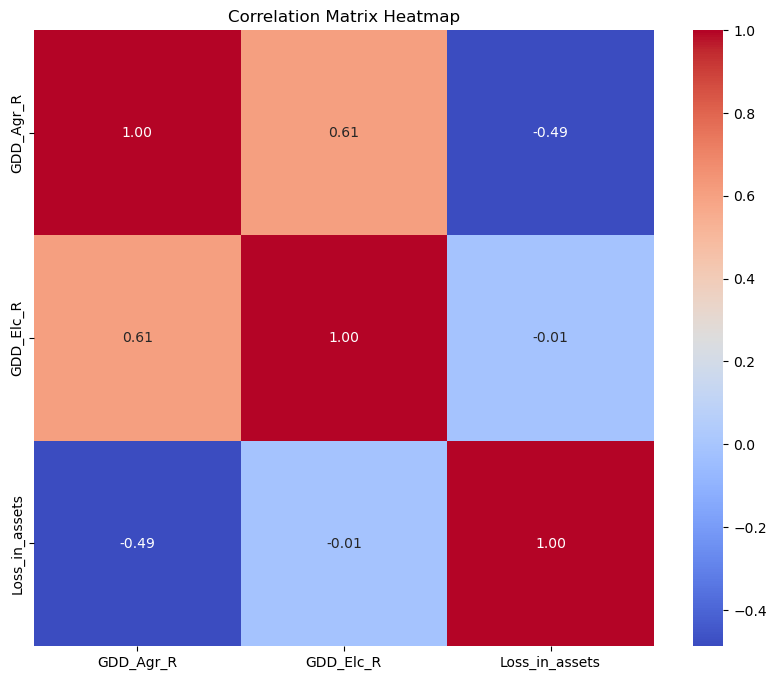

In [119]:
# Creating correlation matrix for pairs of independent variables
correlation_df1 = model_data[['GDD_Agr_R', 'GDD_Elc_R', 'Loss_in_assets']]
correlation_matrix1 = correlation_df1.corr()
print('Correlation Matrix')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Findings:
The variable "Loss_in_assets" has moderate negative correlation with "GDD_Agr_R" and weak correlation with variable "GDD_Elc_R". The correlation between pair of independent variable is 0.61, that is also moderate.

#### Linearity Assumption:

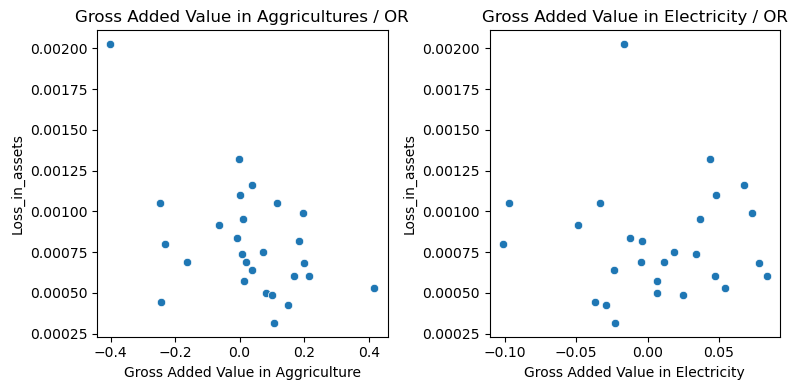

In [120]:
# Creating a scatterplot for each independent variable and the dependent variable.

fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.scatterplot(x = model_data['GDD_Agr_R'], y = model_data['Loss_in_assets'],ax=axes[0])
axes[0].set_title("Gross Added Value in Aggricultures / OR")
axes[0].set_xlabel("Gross Added Value in Aggriculture")
sns.scatterplot(x = model_data['GDD_Elc_R'], y = model_data['Loss_in_assets'],ax=axes[1])
axes[1].set_title("Gross Added Value in Electricity / OR")
axes[1].set_xlabel("Gross Added Value in Electricity")
plt.tight_layout()

### Findings:
It is difficult to confirm presence of linear relationships between independent and dependent variables as the data points are limited.

#### Normality Assumption

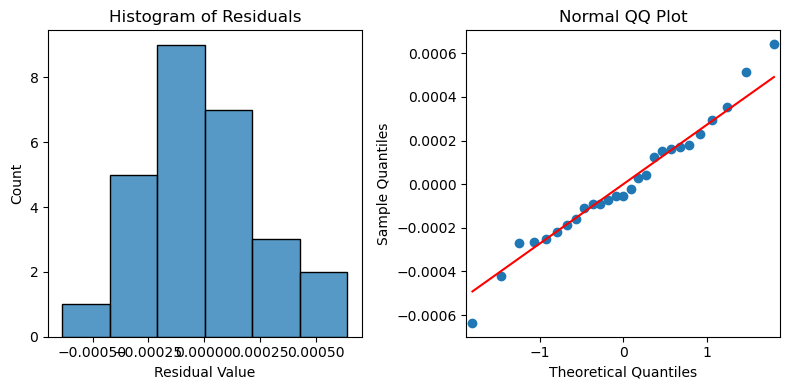

In [121]:
# Calculating the model residuals.

residuals = ols_model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Crearing histogram of residuals.
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Creating a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")

plt.tight_layout()

plt.show()

### Findings:
The histogram of the residuals seems to be normally distributed, which confirms that the normality assumption is met for this model. The residuals in the Q-Q plot is also confirm that Normality Assumption is met Q-Q plot forms a straight line.

#### Constant Variance Assumption

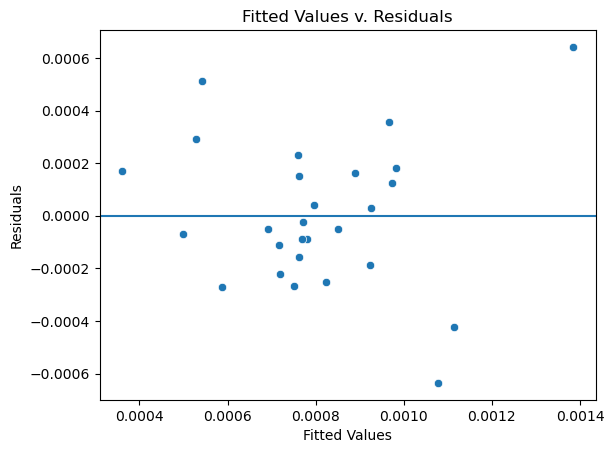

In [122]:
# Creating a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = ols_model.fittedvalues, y = ols_model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

### Findings:
Fitted values of variance seem to be similarly distributed and confirms that the assumption is met.

#### No Multicollinearity Assumption

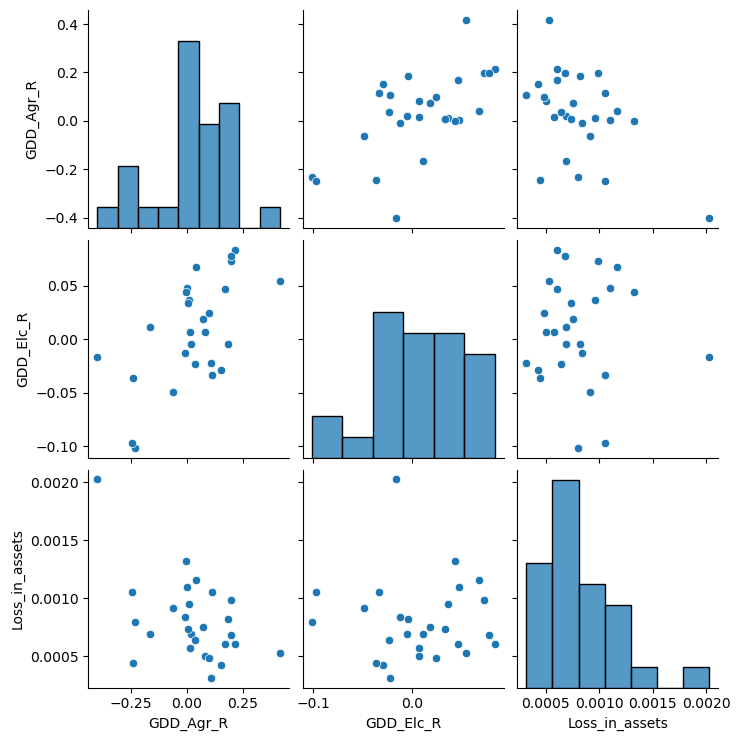

In [123]:
# Checking for multicollinearity

columns = ['GDD_Agr_R', 'GDD_Elc_R', 'Loss_in_assets']

sns.pairplot(model_data[columns])
plt.show()

In [124]:
# Calculating the variance inflation factor (optional).

X = model_data[['GDD_Agr_R', 'GDD_Elc_R']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
GDD_Agr_R,1.611449
GDD_Elc_R,1.611449


### Findings:
As it was confirmed by correlation matrix Heat Map there is a moderate linear relationship between "GDD_Agr_R" and "GDD_Elc_R" that violates the multicollinearity assumption. But calculated, the variance inflation factor is 1.6111 for each variable, indicating weak multicollinearity.

## 2. Poisson Regression

### 2.1. Data Preprocessing

In [125]:
# Checking the dataframe - first 5 rows of Operational Risk Losses type 1
or_loss_type1.head(5)

,Loss,Period,Date,Year,Month
0,1877,1,2016-12-31,2016,12
1,1807,1,2016-12-30,2016,12
2,918,1,2016-12-30,2016,12
3,1480,1,2016-12-29,2016,12
4,1218,1,2016-12-27,2016,12


In [126]:
# Checking the dataframe - last 5 rows  of Operational Risk Losses type 1
or_loss_type1.tail(5)

,Loss,Period,Date,Year,Month
1960,18,40,2007-01-11,2007,1
1961,3313,40,2007-01-10,2007,1
1962,1002,40,2007-01-10,2007,1
1963,162,40,2007-01-07,2007,1
1964,69,40,2007-01-01,2007,1


In [127]:
# Filtering the dataframe to keep data equal to Y2010 and above
df_filtered1= or_loss_type1[or_loss_type1['Year'] >= 2010]

print(df_filtered1.head(5))
print(df_filtered1.tail(5))

   Loss  Period       Date  Year  Month
0  1877       1 2016-12-31  2016     12
1  1807       1 2016-12-30  2016     12
2   918       1 2016-12-30  2016     12
3  1480       1 2016-12-29  2016     12
4  1218       1 2016-12-27  2016     12
      Loss  Period       Date  Year  Month
1382    41      28 2010-01-10  2010      1
1383   558      28 2010-01-09  2010      1
1384   503      28 2010-01-09  2010      1
1385   319      28 2010-01-02  2010      1
1386   392      28 2010-01-01  2010      1


In [131]:
# Extracting the quarter from the 'Date' column
df_filtered1 = df_filtered1.copy()
df_filtered1['Quarter'] = df_filtered1['Date'].dt.to_period('Q')

# Grouping the dataframe by quarter and count the number of losses in each quarter
losses_by_quarter1 = df_filtered1.groupby('Quarter').size()

# Print the number of losses by quarter
print(losses_by_quarter1)
losses_by_quarter1 = pd.DataFrame(losses_by_quarter1)

Quarter
2010Q1    53
2010Q2    48
2010Q3    58
2010Q4    64
2011Q1    44
2011Q2    58
2011Q3    47
2011Q4    47
2012Q1    40
2012Q2    43
2012Q3    51
2012Q4    60
2013Q1    47
2013Q2    41
2013Q3    40
2013Q4    51
2014Q1    53
2014Q2    44
2014Q3    48
2014Q4    51
2015Q1    57
2015Q2    53
2015Q3    41
2015Q4    57
2016Q1    56
2016Q2    43
2016Q3    47
2016Q4    45
Freq: Q-DEC, dtype: int64


In [132]:
# Checking the dataframe - first 5 rows of Operational Risk Losses type 2
or_loss_type2.head(5)

,Loss,Period,Date,Year,Month
0,181,1,2016-12-31,2016,12
1,610,1,2016-12-23,2016,12
2,961,1,2016-12-19,2016,12
3,1312,1,2016-12-19,2016,12
4,259,1,2016-12-14,2016,12


In [133]:
# Checking the dataframe - last 5 rows of Operational Risk Losses type 2
or_loss_type2.tail(5)

,Loss,Period,Date,Year,Month
2020,1953,40,2007-01-08,2007,1
2021,425,40,2007-01-07,2007,1
2022,69,40,2007-01-05,2007,1
2023,2307,40,2007-01-04,2007,1
2024,1114,40,2007-01-01,2007,1


In [134]:
# Filtering the dataframe to keep data equal to Y2010 and above
df_filtered2= or_loss_type2[or_loss_type2['Year'] >= 2010]

print(df_filtered2.head(5))
print(df_filtered2.tail(5))

   Loss  Period       Date  Year  Month
0   181       1 2016-12-31  2016     12
1   610       1 2016-12-23  2016     12
2   961       1 2016-12-19  2016     12
3  1312       1 2016-12-19  2016     12
4   259       1 2016-12-14  2016     12
      Loss  Period       Date  Year  Month
1412   893      28 2010-01-09  2010      1
1413  2096      28 2010-01-09  2010      1
1414   466      28 2010-01-03  2010      1
1415  1779      28 2010-01-03  2010      1
1416  2272      28 2010-01-01  2010      1


In [136]:
# Extracting the quarter from the 'Date' column
df_filtered2 = df_filtered2.copy()
df_filtered2['Quarter'] = df_filtered2['Date'].dt.to_period('Q')

# Grouping the dataframe by quarter and count the number of losses in each quarter
losses_by_quarter2 = df_filtered2.groupby('Quarter').size()

# Print the number of losses by quarter
print(losses_by_quarter2)
losses_by_quarter2 = pd.DataFrame(losses_by_quarter2)

Quarter
2010Q1    55
2010Q2    51
2010Q3    49
2010Q4    39
2011Q1    45
2011Q2    47
2011Q3    48
2011Q4    44
2012Q1    68
2012Q2    47
2012Q3    42
2012Q4    57
2013Q1    51
2013Q2    59
2013Q3    51
2013Q4    54
2014Q1    51
2014Q2    45
2014Q3    39
2014Q4    61
2015Q1    38
2015Q2    63
2015Q3    55
2015Q4    44
2016Q1    56
2016Q2    54
2016Q3    53
2016Q4    51
Freq: Q-DEC, dtype: int64


In [137]:
# Checking the dataframe - first 5 rows of Operational Risk Losses type 3
or_loss_type3.head(5)

,Loss,Period,Date,Year,Month
0,1334,1,2016-12-31,2016,12
1,1067,1,2016-12-30,2016,12
2,1068,1,2016-12-29,2016,12
3,714,1,2016-12-26,2016,12
4,1590,1,2016-12-26,2016,12


In [138]:
# Checking the dataframe - last 5 rows of Operational Risk Losses type 3
or_loss_type3.tail(5)

,Loss,Period,Date,Year,Month
1990,362,40,2007-01-04,2007,1
1991,519,40,2007-01-03,2007,1
1992,1003,40,2007-01-03,2007,1
1993,943,40,2007-01-02,2007,1
1994,331,40,2007-01-02,2007,1


In [139]:
# Filtering the dataframe to keep data equal to Y2010 and above
df_filtered3= or_loss_type3[or_loss_type3['Year'] >= 2010]

print(df_filtered3.head(5))
print(df_filtered3.tail(5))

   Loss  Period       Date  Year  Month
0  1334       1 2016-12-31  2016     12
1  1067       1 2016-12-30  2016     12
2  1068       1 2016-12-29  2016     12
3   714       1 2016-12-26  2016     12
4  1590       1 2016-12-26  2016     12
      Loss  Period       Date  Year  Month
1373   249      28 2010-01-07  2010      1
1374  2015      28 2010-01-06  2010      1
1375   631      28 2010-01-04  2010      1
1376   564      28 2010-01-02  2010      1
1377   338      28 2010-01-02  2010      1


In [141]:
# Extracting the quarter from the 'Date' column
df_filtered3 = df_filtered3.copy()
df_filtered3['Quarter'] = df_filtered3['Date'].dt.to_period('Q')

# Grouping the dataframe by quarter and count the number of losses in each quarter
losses_by_quarter3 = df_filtered3.groupby('Quarter').size()

# Print the number of losses by quarter
print(losses_by_quarter3)
losses_by_quarter3 = pd.DataFrame(losses_by_quarter3)

Quarter
2010Q1    51
2010Q2    44
2010Q3    48
2010Q4    43
2011Q1    41
2011Q2    48
2011Q3    37
2011Q4    36
2012Q1    33
2012Q2    47
2012Q3    51
2012Q4    66
2013Q1    55
2013Q2    52
2013Q3    41
2013Q4    45
2014Q1    47
2014Q2    58
2014Q3    43
2014Q4    44
2015Q1    56
2015Q2    49
2015Q3    64
2015Q4    54
2016Q1    61
2016Q2    59
2016Q3    48
2016Q4    57
Freq: Q-DEC, dtype: int64


In [142]:
# Checking the dataframe - first 5 rows of Operational Risk Losses type 4
or_loss_type4.head(5)

,Loss,Period,Date,Year,Month
0,650,1,2016-12-31,2016,12
1,847,1,2016-12-30,2016,12
2,242,1,2016-12-11,2016,12
3,513,1,2016-12-09,2016,12
4,264,1,2016-12-07,2016,12


In [143]:
# Checking the dataframe - first 5 rows of Operational Risk Losses type 4
or_loss_type4.tail(5)

,Loss,Period,Date,Year,Month
1936,1231,40,2007-01-05,2007,1
1937,233,40,2007-01-05,2007,1
1938,1861,40,2007-01-04,2007,1
1939,1671,40,2007-01-03,2007,1
1940,886,40,2007-01-02,2007,1


In [144]:
# Filtering the dataframe to keep data equal to Y2010 and above
df_filtered4= or_loss_type4[or_loss_type4['Year'] >= 2010]

print(df_filtered4.head(5))
print(df_filtered4.tail(5))

   Loss  Period       Date  Year  Month
0   650       1 2016-12-31  2016     12
1   847       1 2016-12-30  2016     12
2   242       1 2016-12-11  2016     12
3   513       1 2016-12-09  2016     12
4   264       1 2016-12-07  2016     12
      Loss  Period       Date  Year  Month
1350   418      28 2010-01-09  2010      1
1351  1202      28 2010-01-07  2010      1
1352  3206      28 2010-01-06  2010      1
1353   483      28 2010-01-06  2010      1
1354  1088      28 2010-01-01  2010      1


In [146]:
# Extracting the quarter from the 'Date' column
df_filtered4 = df_filtered4.copy()
df_filtered4['Quarter'] = df_filtered4['Date'].dt.to_period('Q')

# Grouping the dataframe by quarter and count the number of losses in each quarter
losses_by_quarter4 = df_filtered4.groupby('Quarter').size()

# Print the number of losses by quarter
print(losses_by_quarter4)
losses_by_quarter4 = pd.DataFrame(losses_by_quarter4)

Quarter
2010Q1    60
2010Q2    35
2010Q3    47
2010Q4    42
2011Q1    44
2011Q2    43
2011Q3    37
2011Q4    56
2012Q1    61
2012Q2    56
2012Q3    49
2012Q4    51
2013Q1    58
2013Q2    58
2013Q3    45
2013Q4    48
2014Q1    51
2014Q2    56
2014Q3    33
2014Q4    48
2015Q1    52
2015Q2    27
2015Q3    53
2015Q4    41
2016Q1    48
2016Q2    55
2016Q3    54
2016Q4    47
Freq: Q-DEC, dtype: int64


In [147]:
# Creating the combined dataframe for Operational Risk losses 
losses_count = pd.concat([losses_by_quarter1, losses_by_quarter2, losses_by_quarter3, losses_by_quarter4], axis =1)
losses_count.columns = ['Loss_1', 'Loss_2', 'Loss_3', 'Loss_4']
losses_count

,Loss_1,Loss_2,Loss_3,Loss_4
Quarter,,,,
2010Q1,53,55,51,60
2010Q2,48,51,44,35
2010Q3,58,49,48,47
2010Q4,64,39,43,42
2011Q1,44,45,41,44
2011Q2,58,47,48,43
2011Q3,47,48,37,37
2011Q4,47,44,36,56
2012Q1,40,68,33,61


In [148]:
losses_count['Total_loss_quantity'] = losses_count['Loss_1'] + losses_count['Loss_2'] + losses_count['Loss_3'] + losses_count['Loss_4']
losses_count

,Loss_1,Loss_2,Loss_3,Loss_4,Total_loss_quantity
Quarter,,,,,
2010Q1,53,55,51,60,219
2010Q2,48,51,44,35,178
2010Q3,58,49,48,47,202
2010Q4,64,39,43,42,188
2011Q1,44,45,41,44,174
2011Q2,58,47,48,43,196
2011Q3,47,48,37,37,169
2011Q4,47,44,36,56,183
2012Q1,40,68,33,61,202


In [149]:
# Getting descriptive statistics on the dataframe
losses_count.describe()

,Loss_1,Loss_2,Loss_3,Loss_4,Total_loss_quantity
count,28.000000,28.000000,28.000000,28.000000,28.00000
mean,49.535714,50.607143,49.214286,48.392857,197.75000
std,6.619176,7.355216,8.332698,8.473660,16.13284
min,40.000000,38.000000,33.000000,27.000000,163.00000
25%,44.000000,45.000000,43.750000,43.750000,191.00000
50%,48.000000,51.000000,48.000000,48.500000,201.00000
75%,53.750000,55.000000,55.250000,55.250000,205.50000
max,64.000000,68.000000,66.000000,61.000000,234.00000


### Findings:
The minimum annual frequency of losses is 163 for sum of all types and the maximum is 234 and average is 198 and median 201.
Different Operational Risk types has almost the same median as 48 and mean close to 49 Operational Risks per Quarter.

In [150]:
# Checking dataframe and dropping first row
print(losses_count.shape)
losses_count_filtered = losses_count.drop(losses_count.index[0])
print(losses_count_filtered.shape)

(28, 5)
(27, 5)


In [151]:
# Checking datarame for datatypes and size
losses_count_filtered.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 27 entries, 2010Q2 to 2016Q4
Freq: Q-DEC
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Loss_1               27 non-null     int64
 1   Loss_2               27 non-null     int64
 2   Loss_3               27 non-null     int64
 3   Loss_4               27 non-null     int64
 4   Total_loss_quantity  27 non-null     int64
dtypes: int64(5)
memory usage: 1.3 KB


### 2.2. Automated selection of the best model by iteration over generated 1326 pairs of independent variables applying statistical tests on multicollinearity (variance inflation factor), stationarity and p-value and choosing the best model with the best R2 (coefficient of determination).

The p-value is set before the statistical test as 0.2, the acceptable Variance Inflation Factor is set to 10 and acceptable value of coefficient of determination - R2 is set to 0.35.

In [152]:
# Automation of process of feature selection for Poisson regression model by evaluating different combinations of features
# and selecting the combination that results in the best model performance.
model_data = pd.DataFrame(model_data)

X = model_data.drop(['Loss_in_assets', 'Value (Billion)'], axis=1)
y = losses_count_filtered['Total_loss_quantity']

# Reset indices if necessary to ensure they start from 0 and are consecutive
y.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)

# Recheck the indices after resetting
print("Indices of endog (y) after resetting:", y.index)
print("Indices of exog (X) after resetting:", X.index)

def find_best_model(model_data):
    best_deviance = np.inf
    best_model = None
    best_features = None
    total_combinations = len(list(itertools.combinations(X.columns.tolist(), 2)))
    combination_count = 0

    for combo in itertools.combinations(X.columns.tolist(), 2):
        combination_count += 1
        print(f"Combination {combination_count} out of {total_combinations}")

        selected_features = X[list(combo)]
        selected_features = sm.add_constant(selected_features)

        # Fit Poisson regression model
        model = sm.GLM(y, selected_features, family=sm.families.Poisson()).fit()
        
        # Check deviance and update best model if needed
        if model.deviance < best_deviance:
            best_deviance = model.deviance
            best_model = model
            best_features = list(combo)

    return best_model, best_features

# Find the best model
best_model, best_features = find_best_model(model_data)
print("Best independent variables:", best_features)
print("Deviance of the best model:", best_model.deviance)
print(best_model.summary())


Indices of endog (y) after resetting: RangeIndex(start=0, stop=27, step=1)
Indices of exog (X) after resetting: RangeIndex(start=0, stop=27, step=1)
Combination 1 out of 1326
Combination 2 out of 1326
Combination 3 out of 1326
Combination 4 out of 1326
Combination 5 out of 1326
Combination 6 out of 1326
Combination 7 out of 1326
Combination 8 out of 1326
Combination 9 out of 1326
Combination 10 out of 1326
Combination 11 out of 1326
Combination 12 out of 1326
Combination 13 out of 1326
Combination 14 out of 1326
Combination 15 out of 1326
Combination 16 out of 1326
Combination 17 out of 1326
Combination 18 out of 1326
Combination 19 out of 1326
Combination 20 out of 1326
Combination 21 out of 1326
Combination 22 out of 1326
Combination 23 out of 1326
Combination 24 out of 1326
Combination 25 out of 1326
Combination 26 out of 1326
Combination 27 out of 1326
Combination 28 out of 1326
Combination 29 out of 1326
Combination 30 out of 1326
Combination 31 out of 1326
Combination 32 out of 1

Combination 302 out of 1326
Combination 303 out of 1326
Combination 304 out of 1326
Combination 305 out of 1326
Combination 306 out of 1326
Combination 307 out of 1326
Combination 308 out of 1326
Combination 309 out of 1326
Combination 310 out of 1326
Combination 311 out of 1326
Combination 312 out of 1326
Combination 313 out of 1326
Combination 314 out of 1326
Combination 315 out of 1326
Combination 316 out of 1326
Combination 317 out of 1326
Combination 318 out of 1326
Combination 319 out of 1326
Combination 320 out of 1326
Combination 321 out of 1326
Combination 322 out of 1326
Combination 323 out of 1326
Combination 324 out of 1326
Combination 325 out of 1326
Combination 326 out of 1326
Combination 327 out of 1326
Combination 328 out of 1326
Combination 329 out of 1326
Combination 330 out of 1326
Combination 331 out of 1326
Combination 332 out of 1326
Combination 333 out of 1326
Combination 334 out of 1326
Combination 335 out of 1326
Combination 336 out of 1326
Combination 337 out 

Combination 619 out of 1326
Combination 620 out of 1326
Combination 621 out of 1326
Combination 622 out of 1326
Combination 623 out of 1326
Combination 624 out of 1326
Combination 625 out of 1326
Combination 626 out of 1326
Combination 627 out of 1326
Combination 628 out of 1326
Combination 629 out of 1326
Combination 630 out of 1326
Combination 631 out of 1326
Combination 632 out of 1326
Combination 633 out of 1326
Combination 634 out of 1326
Combination 635 out of 1326
Combination 636 out of 1326
Combination 637 out of 1326
Combination 638 out of 1326
Combination 639 out of 1326
Combination 640 out of 1326
Combination 641 out of 1326
Combination 642 out of 1326
Combination 643 out of 1326
Combination 644 out of 1326
Combination 645 out of 1326
Combination 646 out of 1326
Combination 647 out of 1326
Combination 648 out of 1326
Combination 649 out of 1326
Combination 650 out of 1326
Combination 651 out of 1326
Combination 652 out of 1326
Combination 653 out of 1326
Combination 654 out 

Combination 924 out of 1326
Combination 925 out of 1326
Combination 926 out of 1326
Combination 927 out of 1326
Combination 928 out of 1326
Combination 929 out of 1326
Combination 930 out of 1326
Combination 931 out of 1326
Combination 932 out of 1326
Combination 933 out of 1326
Combination 934 out of 1326
Combination 935 out of 1326
Combination 936 out of 1326
Combination 937 out of 1326
Combination 938 out of 1326
Combination 939 out of 1326
Combination 940 out of 1326
Combination 941 out of 1326
Combination 942 out of 1326
Combination 943 out of 1326
Combination 944 out of 1326
Combination 945 out of 1326
Combination 946 out of 1326
Combination 947 out of 1326
Combination 948 out of 1326
Combination 949 out of 1326
Combination 950 out of 1326
Combination 951 out of 1326
Combination 952 out of 1326
Combination 953 out of 1326
Combination 954 out of 1326
Combination 955 out of 1326
Combination 956 out of 1326
Combination 957 out of 1326
Combination 958 out of 1326
Combination 959 out 

Combination 1211 out of 1326
Combination 1212 out of 1326
Combination 1213 out of 1326
Combination 1214 out of 1326
Combination 1215 out of 1326
Combination 1216 out of 1326
Combination 1217 out of 1326
Combination 1218 out of 1326
Combination 1219 out of 1326
Combination 1220 out of 1326
Combination 1221 out of 1326
Combination 1222 out of 1326
Combination 1223 out of 1326
Combination 1224 out of 1326
Combination 1225 out of 1326
Combination 1226 out of 1326
Combination 1227 out of 1326
Combination 1228 out of 1326
Combination 1229 out of 1326
Combination 1230 out of 1326
Combination 1231 out of 1326
Combination 1232 out of 1326
Combination 1233 out of 1326
Combination 1234 out of 1326
Combination 1235 out of 1326
Combination 1236 out of 1326
Combination 1237 out of 1326
Combination 1238 out of 1326
Combination 1239 out of 1326
Combination 1240 out of 1326
Combination 1241 out of 1326
Combination 1242 out of 1326
Combination 1243 out of 1326
Combination 1244 out of 1326
Combination 12

In [153]:
# Define your dependent variable (y) and independent variables (X)
X = model_data[['rate_usd_corp_1y_iy', 'com_inc']]
y = losses_count_filtered['Total_loss_quantity']

y.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)

# Add a constant term to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the summary statistics of the model
print(poisson_model.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     Total_loss_quantity   No. Observations:                   27
Model:                             GLM   Df Residuals:                       24
Model Family:                  Poisson   Df Model:                            2
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -108.04
Date:                 Fri, 31 May 2024   Deviance:                       23.881
Time:                         22:20:33   Pearson chi2:                     23.9
No. Iterations:                      3   Pseudo R-squ. (CS):             0.3004
Covariance Type:             nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

### Findings:
The Poissone regression model with the "rate_usd_corp_1y_iy" (Weighted average mortgage lending rate for new loans to non-financial organizations in CKB, more than a year) and "com_inc" (commissionary income) with Pseudo coefficient of determination (Pseudo R2) = 0.30, Deviance = 23.88 and p-values < 0.000 for intercept and below 0.05 for independent variables passed all statistical tests and choosen as the best Poissone Regression Model.

### 2.3. Checking for Modelling Assumptions of Poisson Regression

#### Creating correlation matrix

C:\TEMP\ipykernel_2816\750807533.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = correlation_df.corr()


Correlation Matrix:


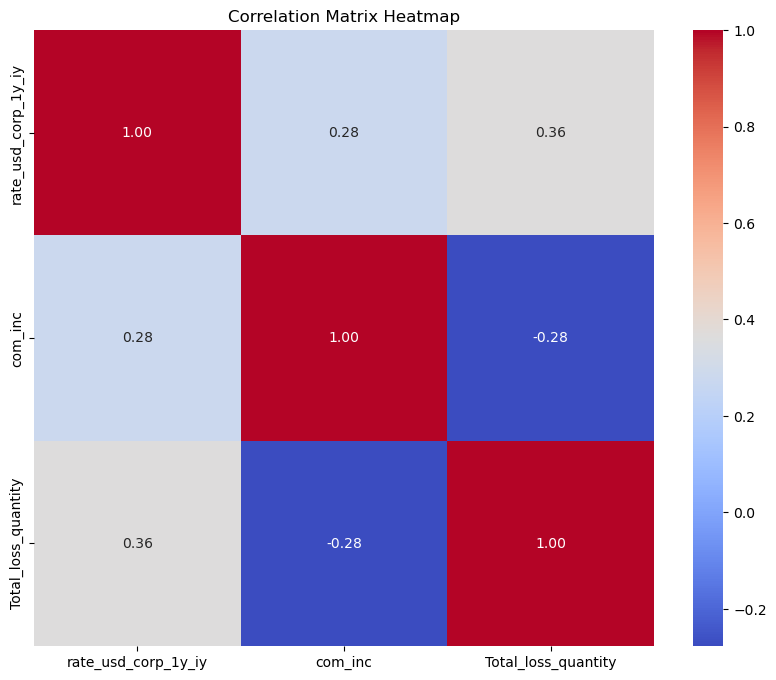

In [193]:
#Creating correlation matrix and HeatMap to find correlation between independent and dependent variables
corr_df1 = model_data[['rate_usd_corp_1y_iy', 'com_inc']]
corr_df2 = losses_count_filtered[['Total_loss_quantity']]
corr_df1_reset = corr_df1.reset_index()
corr_df2_reset = corr_df2.reset_index()
correlation_df = pd.merge(corr_df1_reset, corr_df2_reset, left_index=True, right_index=True)
correlation_df = correlation_df.drop('index', axis=1)
correlation_matrix2 = correlation_df.corr()
print("Correlation Matrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Dependent variable consist of count data assumption

In [154]:
# Checking if data represents integer data type
print(losses_count_filtered['Total_loss_quantity'].dtype)

int64


### Findings
Data type of dependent variable represents integer value.

#### Independent variable, which can be measured on a continuous, ordinal or nominal/dichotomous scale assumption.

In [155]:
# Checking if data represents continuous data type
print(model_data[['rate_usd_corp_1y_iy', 'com_inc']].dtypes)

rate_usd_corp_1y_iy    float64
com_inc                float64
dtype: object


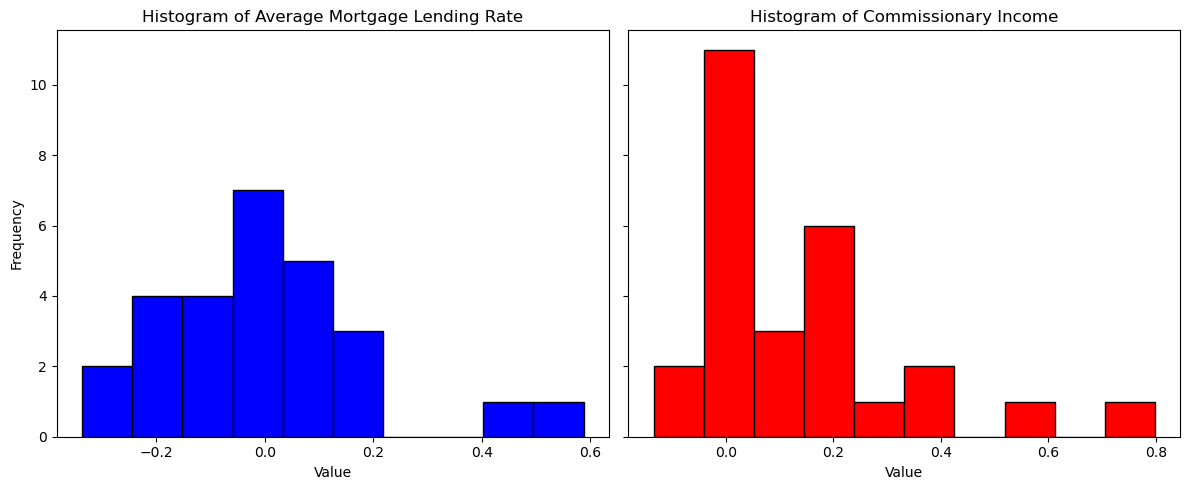

In [156]:
# Ploting histogram for the ontinuous variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(model_data['rate_usd_corp_1y_iy'], bins=10, color='blue', edgecolor='black')
axes[0].set_title('Histogram of Average Mortgage Lending Rate')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(model_data['com_inc'], bins=10, color='red', edgecolor='black')
axes[1].set_title('Histogram of Commissionary Income')
axes[1].set_xlabel('Value')

plt.tight_layout()
plt.show()

### Findings
The datum for independent variables are represented by float64 data type, which shows that data is continuous.
But histograms of independent variables have gaps and distributed not smoothly which do not confirm continuous variables.

#### The mean and variance of the model are identical assumption.

In [167]:
# Compute mean and variance
mean_count = losses_count_filtered['Total_loss_quantity'].mean()
var_count = losses_count_filtered['Total_loss_quantity'].var()
print(mean_count)
print(var_count)

196.96296296296296
252.2678062678063


### Findings
The mean and variance of dependent variable do not have the same value and do not have equidispersion.
This can be as results of presence of outliers in data which can cause overdispersion.

#### Independence of observations assumption. 
The data for independent variable is downloaded from the open source ("OpVaR" package for R) and assumption that each observation is independent of the other observations cannot be confirmed with confidence.

## 3. Stress Testing of Operational Risk Losses

### 3.1. Forecasting Amount of Operational Risk Losses

Correlation Matrix


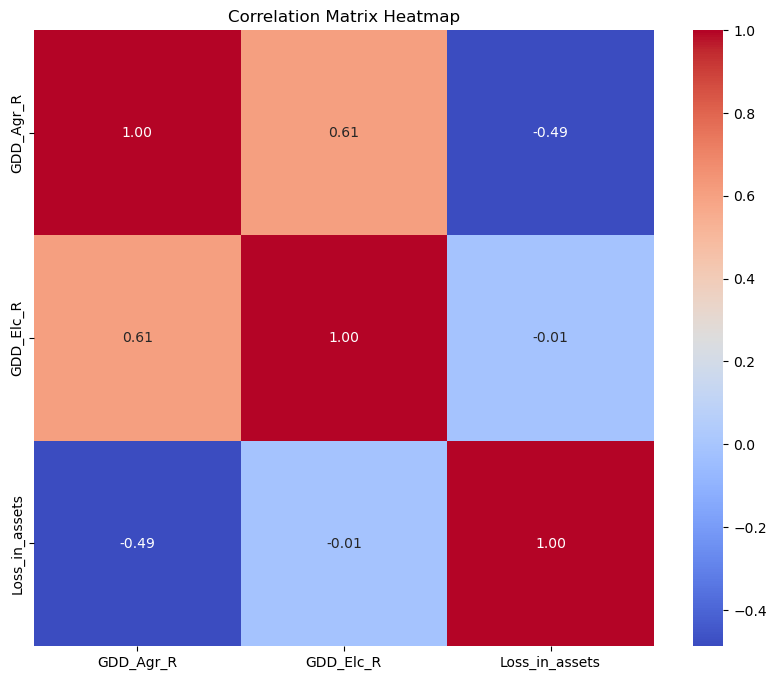

In [168]:
# Checking correlation matrix for independent and dependent variables
correlation_df1 = model_data[['GDD_Agr_R', 'GDD_Elc_R', 'Loss_in_assets']]
correlation_matrix1 = correlation_df1.corr()
print('Correlation Matrix')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Selecting values for Positive and Negative Scenarios

### Findings:
The independent variables have negative correlation with dependent variables.
So increase in independent variables will lead to decrease in dependent variable.
This is why for Positive scenarios the negative values of projected macroeconomic variables are taken.

In [169]:
# Reviewing historical minimum and maximum values of "GDD_Agr_R" variable
gdd_agr_min = model_data['GDD_Agr_R'].min()
print('GDD_Agr_R historical minimum is ', gdd_agr_min)
gdd_agr_max = model_data['GDD_Agr_R'].max()
print('GDD_Agr_R historical maximum is ', gdd_agr_max)

GDD_Agr_R historical minimum is  -0.40093457943925237
GDD_Agr_R historical maximum is  0.4172185430463575


In [170]:
# Reviewing historical minimum and maximum values of "GDD_Elc_R" variable
gdd_elc_min = model_data['GDD_Elc_R'].min()
print('GDD_Elc_R historical minimum is ', gdd_elc_min)
gdd_elc_max = model_data['GDD_Elc_R'].max()
print('GDD_Elc_R historical maximum is ', gdd_elc_max)

GDD_Elc_R historical minimum is  -0.1015625
GDD_Elc_R historical maximum is  0.08369098712446355


In [172]:
# Financial data on Total Assets for the following 3 years for forecasting
total_assets_2017_Q1 = 24161393163
total_assets_2017_Q2 = 24876764416
total_assets_2017_Q3 = 26113749910

In [173]:
# Positive Scenario
GDD_AGR_R_2017_Q1p = 0.776051
GDD_AGR_R_2017_Q2p = 0.894183
GDD_AGR_R_2017_Q3p = 0.959865

GDD_Elc_R_2017_Q1p = 0.484000
GDD_Elc_R_2017_Q2p = 0.541338
GDD_Elc_R_2017_Q3p = 0.664393

In [174]:
# Negative Scenario
GDD_AGR_R_2017_Q1n = -0.276051
GDD_AGR_R_2017_Q2n = -0.194183
GDD_AGR_R_2017_Q3n = -0.019865

GDD_Elc_R_2017_Q1n = -0.068400
GDD_Elc_R_2017_Q2n = -0.071338
GDD_Elc_R_2017_Q3n = -0.086439

In [175]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Loss_in_assets   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     6.900
Date:                Fri, 31 May 2024   Prob (F-statistic):            0.00429
Time:                        23:28:23   Log-Likelihood:                 183.29
No. Observations:                  27   AIC:                            -360.6
Df Residuals:                      24   BIC:                            -356.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008   5.66e-05     14.562      0.000       0.001       0.001
GDD_Agr_R     -0.0015      0.000     -3.714      0.001      -0.002      -0.001
GDD_Elc_R      0.0032      0.001      2.196      0.038       0.000       0.006
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.187
Skew:                           0.168   Prob(JB):                        0.911
Kurtosis:                       3.231   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Forecasting of positive scenario

In [176]:
# Getting coefficients of regression model output
intercept = ols_model.params['Intercept']

print("Intercept:", intercept)

Intercept: 0.0008239234287716745


In [177]:
# Getting coefficients of regression model output
coeff_X1 = ols_model.params['GDD_Agr_R']
coeff_X2 = ols_model.params['GDD_Elc_R']

print("Coefficient for X1:", coeff_X1)
print("Coefficient for X2:", coeff_X2)

Coefficient for X1: -0.001530571424203457
Coefficient for X2: 0.0032162262987277352


In [180]:
#Forecasting share of Operational Risk Losses in Total Assets (Positive scenario)
y_hat2017_Q1p = ols_model.params['Intercept'] + ols_model.params['GDD_Agr_R']* GDD_AGR_R_2017_Q1p + ols_model.params['GDD_Elc_R']*GDD_Elc_R_2017_Q1p
print(y_hat2017_Q1p)

0.0011927754730313813


In [181]:
#Forecasting amount of Operational Risk Losses (Positive scenario)
or_losses_2017_Q1p = total_assets_2017_Q1 * y_hat2017_Q1p
print(or_losses_2017_Q1p)

28819117.15909451


In [182]:
#Forecasting share of Operational Risk Losses in Total Assets (Positive scenario)
y_hat2017_Q2p = ols_model.params['Intercept'] + ols_model.params['GDD_Agr_R']* GDD_AGR_R_2017_Q2p + ols_model.params['GDD_Elc_R']*GDD_Elc_R_2017_Q2p
print(y_hat2017_Q2p)

0.0011963779930638295


In [183]:
#Forecasting amount of Operational Risk Losses (Positive scenario)
or_losses_2017_Q2p = total_assets_2017_Q2 * y_hat2017_Q2p
print(or_losses_2017_Q2p)

29762013.48593577


In [184]:
#Forecasting share of Operational Risk Losses in Total Assets (Positive scenario)
y_hat2017_Q3p = ols_model.params['Intercept'] + ols_model.params['GDD_Agr_R']* GDD_AGR_R_2017_Q3p + ols_model.params['GDD_Elc_R']*GDD_Elc_R_2017_Q3p
print(y_hat2017_Q3p)

0.0014916197279692396


In [185]:
#Forecasting amount of Operational Risk Losses (Positive scenario)
or_losses_2017_Q3p = total_assets_2017_Q3 * y_hat2017_Q3p
print(or_losses_2017_Q3p)

38951784.53701095


Forecasting negative scenario

In [186]:
#Forecasting share of Operational Risk Losses in Total Assets (Negative scenario)
y_hat2017_Q1n = ols_model.params['Intercept'] + ols_model.params['GDD_Agr_R']* GDD_AGR_R_2017_Q1n + ols_model.params['GDD_Elc_R']*GDD_Elc_R_2017_Q1n
print(y_hat2017_Q1n)

0.0010264493221614859


In [187]:
#Forecasting amount of Operational Risk Losses (Negative scenario)
or_losses_2017_Q1n = total_assets_2017_Q1 * y_hat2017_Q1n
print(or_losses_2017_Q1n)

24800445.63463851


In [188]:
#Forecasting share of Operational Risk Losses in Total Assets (Negative scenario)
y_hat2017_Q2n = ols_model.params['Intercept'] + ols_model.params['GDD_Agr_R']* GDD_AGR_R_2017_Q2n + ols_model.params['GDD_Elc_R']*GDD_Elc_R_2017_Q2n
print(y_hat2017_Q2n)

0.0008916952279391351


In [189]:
#Forecasting amount of Operational Risk Losses (Negative scenario)
or_losses_2017_Q2n = total_assets_2017_Q2 * y_hat2017_Q2n
print(or_losses_2017_Q2n)

22182492.116313286


In [190]:
#Forecasting share of Operational Risk Losses in Total Assets (Negative scenario)
y_hat2017_Q3n = ols_model.params['Intercept'] + ols_model.params['GDD_Agr_R']* GDD_AGR_R_2017_Q3n + ols_model.params['GDD_Elc_R']*GDD_Elc_R_2017_Q3n
print(y_hat2017_Q3n)

0.0005763208450777495


In [191]:
#Forecasting amount of Operational Risk Losses (Negative scenario)
or_losses_2017_Q3n = total_assets_2017_Q3 * y_hat2017_Q3n
print(or_losses_2017_Q3n)

15049898.416280204


### 3.2. Frequency of events

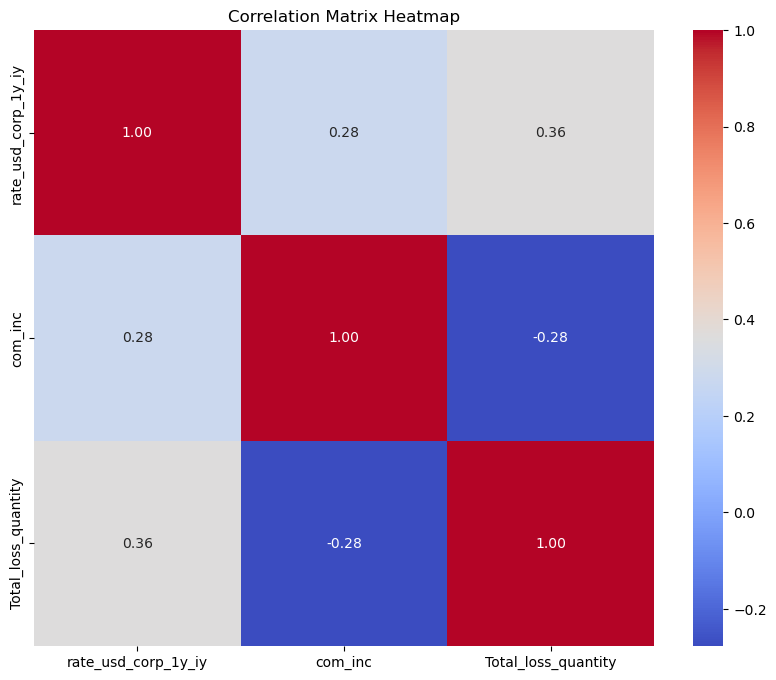

In [194]:
# Checking correlation matrix and Heatmap for independent and dependent variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [195]:
# Getting Poisson model summary
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     Total_loss_quantity   No. Observations:                   27
Model:                             GLM   Df Residuals:                       24
Model Family:                  Poisson   Df Model:                            2
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -108.04
Date:                 Fri, 31 May 2024   Deviance:                       23.881
Time:                         23:36:33   Pearson chi2:                     23.9
No. Iterations:                      3   Pseudo R-squ. (CS):             0.3004
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.3053      0.017    314.823      0.000       5.272       5.338
rate_usd_corp_1y_iy     0.1861      0.070      2.661      0.008       0.049       0.323
com_inc                -0.1649      0.072     -2.282      0.022      -0.307      -0.023
=======================================================================================
"""

In [196]:
# Getting Poisson model coefficient
constant = poisson_model.params['const']

print("Coefficient for the intercept:", constant)

Coefficient for the intercept: 5.305328967253424


In [197]:
# Getting Poisson model coefficient
coeff_X1 = poisson_model.params['rate_usd_corp_1y_iy']
coeff_X2 = poisson_model.params['com_inc']

print("Coefficient for X1:", coeff_X1)
print("Coefficient for X2:", coeff_X2)

Coefficient for X1: 0.18607216113592306
Coefficient for X2: -0.16492192186946308


### Findings:
The independent variables have positive correlation with dependent variables.
So increase in independent variables will lead to increase in dependent variable.
This is why for Positive scenarios the positive values and for Negative scenarios the negative values of projected macroeconomic variables are taken.

In [198]:
# Reviewing historical minimum and maximum values of "rate_usd_corp_1y_iy" variable
rate_usd_corp_min = model_data['rate_usd_corp_1y_iy'].min()
print('Rate_USD_corp historical minimum is ', rate_usd_corp_min)
rate_usd_corp_max = model_data['rate_usd_corp_1y_iy'].max()
print('Rate_USD_corp historical maximum is ', rate_usd_corp_max)

Rate_USD_corp historical minimum is  -0.33684210526315794
Rate_USD_corp historical maximum is  0.5873015873015874


In [199]:
# Reviewing historical minimum and maximum values of "com_inc" variable
com_inc_min = model_data['com_inc'].min()
print('com_inc historical minimum is ', com_inc_min)
com_inc_max = model_data['rate_usd_corp_1y_iy'].max()
print('com_inc historical maximum is ', com_inc_max)

com_inc historical minimum is  -0.13443172511239465
com_inc historical maximum is  0.5873015873015874


In [200]:
# Positive Scenario
rate_usd_corp_2017_Q1p = 0.75255
rate_usd_corp_2017_Q2p = 0.84448
rate_usd_corp_2017_Q3p = 0.92961

com_inc_2017_Q1p = 0.77162
com_inc_2017_Q2p = 0.86419
com_inc_2017_Q3p = 0.98729

In [201]:
# Negative Scenario
rate_usd_corp_2017_Q1n = -0.76125
rate_usd_corp_2017_Q2n = -0.86448
rate_usd_corp_2017_Q3n = -0.93961

com_inc_2017_Q1n = -0.45162
com_inc_2017_Q2n = -0.53419
com_inc_2017_Q3n = -0.62729

Forecasting Positive Scenarios

In [202]:
# Calculating the linear predictor (eta) for 2017 prediction (Positive scenario)
eta_2017_Q1p = poisson_model.params['const'] + poisson_model.params['rate_usd_corp_1y_iy'] * rate_usd_corp_2017_Q1p + poisson_model.params['com_inc'] * com_inc_2017_Q1p

# Applying the link function (natural logarithm)
log_predicted_count2017_Q1p = eta_2017_Q1p

# Predicting the count (y) by taking the exponential function
predicted_count2017_Q1p = np.exp(log_predicted_count2017_Q1p)

print("Predicted count for 2017 Q1:", predicted_count2017_Q1p)

Predicted count for 2017: 203.99602712218905


In [203]:
# Calculating the linear predictor (eta) for 2018 prediction (Positive scenario)
eta_2017_Q2p = poisson_model.params['const'] + poisson_model.params['rate_usd_corp_1y_iy'] * rate_usd_corp_2017_Q2p + poisson_model.params['com_inc'] * com_inc_2017_Q2p

# Applying the link function (natural logarithm)
log_predicted_count2017_Q2p = eta_2017_Q2p

# Predicting the count (y) by taking the exponential function
predicted_count2017_Q2p = np.exp(log_predicted_count2017_Q2p)

print("Predicted count for 2017 Q2:", predicted_count2017_Q2p)


Predicted count for 2017 Q2: 204.37147835838832


In [205]:
# Calculating the linear predictor (eta) for 2019 prediction (Positive scenario)
eta_2017_Q3p = poisson_model.params['const'] + poisson_model.params['rate_usd_corp_1y_iy'] * rate_usd_corp_2017_Q3p + poisson_model.params['com_inc'] * com_inc_2017_Q3p

# Applying the link function (natural logarithm)
log_predicted_count2017_Q3p = eta_2017_Q3p

# Predicting the count (y) by taking the exponential function
predicted_count2017_Q3p = np.exp(log_predicted_count2017_Q3p)

print("Predicted count for 2017 Q3:", predicted_count2017_Q3p)

Predicted count for 2017 Q3: 203.4616926637998


Forecasting Negative Scenarios

In [206]:
# Calculating the linear predictor (eta) for 2017 prediction (Negative scenario)
eta_2017_Q1n = poisson_model.params['const'] + poisson_model.params['rate_usd_corp_1y_iy'] * rate_usd_corp_2017_Q1n + poisson_model.params['com_inc'] * com_inc_2017_Q1n

# Applying the link function (natural logarithm)
log_predicted_count2017_Q1n = eta_2017_Q1n

# Predicting the count (y) by taking the exponential function
predicted_count2017_Q1n = np.exp(log_predicted_count2017_Q1n)

print("Predicted count for 2017 Q1:", predicted_count2017_Q1n)

Predicted count for 2017 Q1: 188.32394147177186


In [207]:
# Calculating the linear predictor (eta) for 2018 prediction (Negative scenario)
eta_2017_Q2n = poisson_model.params['const'] + poisson_model.params['rate_usd_corp_1y_iy'] * rate_usd_corp_2017_Q2n + poisson_model.params['com_inc'] * com_inc_2017_Q2n

# Applying the link function (natural logarithm)
log_predicted_count2017_Q2n = eta_2017_Q2n

# Predicting the count (y) by taking the exponential function
predicted_count2017_Q2n = np.exp(log_predicted_count2017_Q2n)

print("Predicted count for 2017 Q2:", predicted_count2017_Q2n)

Predicted count for 2017 Q2: 187.27403029333652


In [208]:
# Calculating the linear predictor (eta) for 2019 prediction (Negative scenario)
eta_2017_Q3n = poisson_model.params['const'] + poisson_model.params['rate_usd_corp_1y_iy'] * rate_usd_corp_2017_Q3n + poisson_model.params['com_inc'] * com_inc_2017_Q3n

# Applying the link function (natural logarithm)
log_predicted_count2017_Q3n = eta_2017_Q3n

# Predicting the count (y) by taking the exponential function
predicted_count2017_Q3n = np.exp(log_predicted_count2017_Q3n)

print("Predicted count for 2017 Q3:", predicted_count2017_Q3n)

Predicted count for 2017 Q3: 187.53163971063506


In [209]:
# Creating the dataframe with the results of Stress Testing
data = {
    "Operational Risk Loss Amount": [None, 28819117.16, 29762013.49, 38951784.54, None, 24800445.64, 22182492.12, 15049898.42],
    "Operational Risk Frequency": [None, 204, 204, 203, None, 188, 187, 188]
}

# Create the index with the specified rows
index = [
    "Positive scenario", "2017 Q1", "2017 Q2", "2017 Q3",
    "Negative scenario", "2017 Q1", "2017 Q2", "2017 Q3"
]

# Create the DataFrame
or_stress_test = pd.DataFrame(data, index=index)

# Display the DataFrame
or_stress_test

,Operational Risk Loss Amount,Operational Risk Frequency
Positive scenario,NaN,NaN
2017 Q1,28819117.16,204.0
2017 Q2,29762013.49,204.0
2017 Q3,38951784.54,203.0
Negative scenario,NaN,NaN
2017 Q1,24800445.64,188.0
2017 Q2,22182492.12,187.0
2017 Q3,15049898.42,188.0


In [210]:
# Calculating historical annual Operational Risk Loss amounts
superbank['Year'] = superbank['Date'].dt.year
annual_losses = superbank.groupby('Year')['Total_losses_KZT'].sum()
annual_losses

Year
2010    25384279.20
2011    26143225.72
2012    62127725.27
2013    42667596.84
2014    43350003.18
2015    67998604.29
2016    94492274.24
Name: Total_losses_KZT, dtype: float64

In [218]:
# Calculating historical annual Operational Risk Loss amounts by quarters
superbank['Quarter'] = superbank['Date'].dt.to_period('Q')
quarterly_sum = superbank.groupby('Quarter')['Total_losses_KZT'].sum()
quarterly_sum

Quarter
2010Q2     8141676.90
2010Q3     8282690.85
2010Q4     8959911.45
2011Q1     6068308.56
2011Q2     7087464.18
2011Q3     6237068.18
2011Q4     6750384.80
2012Q1    26595557.82
2012Q2    11112124.53
2012Q3     8479289.26
2012Q4    15940753.66
2013Q1    12932723.43
2013Q2    14140939.89
2013Q3     6443922.54
2013Q4     9150010.98
2014Q1     7487812.53
2014Q2    12510329.04
2014Q3     5484647.52
2014Q4    17867214.09
2015Q1    14109788.55
2015Q2    19651264.71
2015Q3    20559249.06
2015Q4    13678301.97
2016Q1    24954070.96
2016Q2    31673751.20
2016Q3    20380076.08
2016Q4    17484376.00
Freq: Q-DEC, Name: Total_losses_KZT, dtype: float64

In [211]:
# Calculating historical annual Operational Risk Frequency for type 1
loss_frequency_type1 = or_loss_type1.groupby('Year')['Loss'].count()
loss_frequency_type1

Year
2007    210
2008    169
2009    199
2010    223
2011    196
2012    194
2013    179
2014    196
2015    208
2016    191
Name: Loss, dtype: int64

In [229]:
# Calculating historical annual Operational Risk Frequency for type 1 by quarter
or_loss_type1['Quarter'] = or_loss_type1['Date'].dt.to_period('Q')
loss_sum_by_quarter_1 = or_loss_type1.groupby('Quarter')['Loss'].count()
loss_sum_by_quarter_1

Quarter
2007Q1    51
2007Q2    50
2007Q3    57
2007Q4    52
2008Q1    40
2008Q2    42
2008Q3    38
2008Q4    49
2009Q1    50
2009Q2    43
2009Q3    51
2009Q4    55
2010Q1    53
2010Q2    48
2010Q3    58
2010Q4    64
2011Q1    44
2011Q2    58
2011Q3    47
2011Q4    47
2012Q1    40
2012Q2    43
2012Q3    51
2012Q4    60
2013Q1    47
2013Q2    41
2013Q3    40
2013Q4    51
2014Q1    53
2014Q2    44
2014Q3    48
2014Q4    51
2015Q1    57
2015Q2    53
2015Q3    41
2015Q4    57
2016Q1    56
2016Q2    43
2016Q3    47
2016Q4    45
Freq: Q-DEC, Name: Loss, dtype: int64

In [212]:
# Calculating historical annual Operational Risk Frequency for type 2
loss_frequency_type2 = or_loss_type2.groupby('Year')['Loss'].count()
loss_frequency_type2

Year
2007    191
2008    221
2009    196
2010    194
2011    184
2012    214
2013    215
2014    196
2015    200
2016    214
Name: Loss, dtype: int64

In [221]:
# Calculating historical annual Operational Risk Frequency for type 2 by quarter
or_loss_type2['Quarter'] = or_loss_type2['Date'].dt.to_period('Q')
loss_sum_by_quarter_2 = or_loss_type2.groupby('Quarter')['Loss'].count()
loss_sum_by_quarter_2

Quarter
2007Q1    52
2007Q2    50
2007Q3    50
2007Q4    39
2008Q1    58
2008Q2    61
2008Q3    48
2008Q4    54
2009Q1    58
2009Q2    51
2009Q3    44
2009Q4    43
2010Q1    55
2010Q2    51
2010Q3    49
2010Q4    39
2011Q1    45
2011Q2    47
2011Q3    48
2011Q4    44
2012Q1    68
2012Q2    47
2012Q3    42
2012Q4    57
2013Q1    51
2013Q2    59
2013Q3    51
2013Q4    54
2014Q1    51
2014Q2    45
2014Q3    39
2014Q4    61
2015Q1    38
2015Q2    63
2015Q3    55
2015Q4    44
2016Q1    56
2016Q2    54
2016Q3    53
2016Q4    51
Freq: Q-DEC, Name: Loss, dtype: int64

In [213]:
# Calculating historical annual Operational Risk Frequency for type 3
loss_frequency_type3 = or_loss_type3.groupby('Year')['Loss'].count()
loss_frequency_type3

Year
2007    214
2008    200
2009    203
2010    186
2011    162
2012    197
2013    193
2014    192
2015    223
2016    225
Name: Loss, dtype: int64

In [222]:
# Calculating historical annual Operational Risk Frequency for type 3 by quarter
or_loss_type3['Quarter'] = or_loss_type3['Date'].dt.to_period('Q')
loss_sum_by_quarter_3 = or_loss_type3.groupby('Quarter')['Loss'].count()
loss_sum_by_quarter_3

Quarter
2007Q1    48
2007Q2    53
2007Q3    53
2007Q4    60
2008Q1    59
2008Q2    44
2008Q3    48
2008Q4    49
2009Q1    45
2009Q2    52
2009Q3    46
2009Q4    60
2010Q1    51
2010Q2    44
2010Q3    48
2010Q4    43
2011Q1    41
2011Q2    48
2011Q3    37
2011Q4    36
2012Q1    33
2012Q2    47
2012Q3    51
2012Q4    66
2013Q1    55
2013Q2    52
2013Q3    41
2013Q4    45
2014Q1    47
2014Q2    58
2014Q3    43
2014Q4    44
2015Q1    56
2015Q2    49
2015Q3    64
2015Q4    54
2016Q1    61
2016Q2    59
2016Q3    48
2016Q4    57
Freq: Q-DEC, Name: Loss, dtype: int64

In [214]:
4# Calculating historical annual Operational Risk Frequency for type 1
loss_frequency_type4 = or_loss_type4.groupby('Year')['Loss'].count()
loss_frequency_type4

Year
2007    191
2008    190
2009    205
2010    184
2011    180
2012    217
2013    209
2014    188
2015    173
2016    204
Name: Loss, dtype: int64

In [223]:
# Calculating historical annual Operational Risk Frequency for type 4 by quarter
or_loss_type4['Quarter'] = or_loss_type4['Date'].dt.to_period('Q')
loss_sum_by_quarter_4 = or_loss_type4.groupby('Quarter')['Loss'].count()
loss_sum_by_quarter_4

Quarter
2007Q1    48
2007Q2    46
2007Q3    41
2007Q4    56
2008Q1    55
2008Q2    49
2008Q3    45
2008Q4    41
2009Q1    52
2009Q2    52
2009Q3    55
2009Q4    46
2010Q1    60
2010Q2    35
2010Q3    47
2010Q4    42
2011Q1    44
2011Q2    43
2011Q3    37
2011Q4    56
2012Q1    61
2012Q2    56
2012Q3    49
2012Q4    51
2013Q1    58
2013Q2    58
2013Q3    45
2013Q4    48
2014Q1    51
2014Q2    56
2014Q3    33
2014Q4    48
2015Q1    52
2015Q2    27
2015Q3    53
2015Q4    41
2016Q1    48
2016Q2    55
2016Q3    54
2016Q4    47
Freq: Q-DEC, Name: Loss, dtype: int64

In [226]:
# Creating dataframe for all Operational Risk Loss types by years
loss_frequency_total_annually = pd.concat([loss_frequency_type1, loss_frequency_type2, loss_frequency_type3, loss_frequency_type4], axis = 1)
loss_frequency_total_annually = pd.DataFrame(loss_frequency_total_annually)
loss_frequency_total_annually

,Loss,Loss,Loss,Loss
Year,,,,
2007,210,191,214,191
2008,169,221,200,190
2009,199,196,203,205
2010,223,194,186,184
2011,196,184,162,180
2012,194,214,197,217
2013,179,215,193,209
2014,196,196,192,188
2015,208,200,223,173


In [231]:
# Calculating annual Operational Risk Loss frequency 
sum_by_year = loss_frequency_total.sum(axis=1)
sum_by_year

Year
2007    806
2008    780
2009    803
2010    787
2011    722
2012    822
2013    796
2014    772
2015    804
2016    834
dtype: int64

In [230]:
# Creating dataframe for all Operational Risk Loss types by quarters
loss_frequency_total_quarterly = pd.concat([loss_sum_by_quarter_1, loss_sum_by_quarter_2, loss_sum_by_quarter_3, loss_sum_by_quarter_4], axis = 1)
loss_frequency_total_quarterly = pd.DataFrame(loss_frequency_total_quarterly)
loss_frequency_total_quarterly

,Loss,Loss,Loss,Loss
Quarter,,,,
2007Q1,51,52,48,48
2007Q2,50,50,53,46
2007Q3,57,50,53,41
2007Q4,52,39,60,56
2008Q1,40,58,59,55
2008Q2,42,61,44,49
2008Q3,38,48,48,45
2008Q4,49,54,49,41
2009Q1,50,58,45,52


In [233]:
# Calculating annual Operational Risk Loss frequency 
sum_by_quarter = loss_frequency_total_quarterly.sum(axis=1)
sum_by_quarter

Quarter
2007Q1    199
2007Q2    199
2007Q3    201
2007Q4    207
2008Q1    212
2008Q2    196
2008Q3    179
2008Q4    193
2009Q1    205
2009Q2    198
2009Q3    196
2009Q4    204
2010Q1    219
2010Q2    178
2010Q3    202
2010Q4    188
2011Q1    174
2011Q2    196
2011Q3    169
2011Q4    183
2012Q1    202
2012Q2    193
2012Q3    193
2012Q4    234
2013Q1    211
2013Q2    210
2013Q3    177
2013Q4    198
2014Q1    202
2014Q2    203
2014Q3    163
2014Q4    204
2015Q1    203
2015Q2    192
2015Q3    213
2015Q4    196
2016Q1    221
2016Q2    211
2016Q3    202
2016Q4    200
Freq: Q-DEC, dtype: int64

## CONCLUSION:
The Stress testing of Operational Risk using Multiple Linear Regression to predict severity (amount) of Operational Risk Losses and Multiple Poisson Regression to predict frequency (number) of Operational Risk Losses shows that models do not predict extremely severe results for both positive and negative scenarios of Stress Testing. But this can be the result of selection of poor scenarios. And this can be a next step to develop plausible possible scenarios of positive (normal) and negative course of events.
Note the last point is that the best coefficient of determination (R2) choosen by the Multiple Linear Regression (Ordinary Least Squares) model is 0.365, that is barely above the accepted threshold of 0.35 for R2 of Linear Regression Model. The best model choosen for Poisson Regression has Pseudo R2 equal to 0.30.
These values of coefficient of determination also affect predicting ability of models and results of forecasting.
For example, the highest historical Operational Risk Losses amount is 94492274.24 in Y2016 and the lowest amount is 25384279.20 in Y2010. Similarly, the worst frequency (number) of Operational Risk Losses is in Y2016 and the lowest number is 722 in Y2011. 
By quarters the highest historical loss amount was 31673751.20 in Q2 2016 and the lowest historical Operational Risk Loss was 5484647.52 in Q3 2014.
But the worst amount (the highest) of Operational Risk Losses predicted by the model is 38951784.54 and the lowest amount is 15049898.42.
The same for the frequency of risks: the highest historical number of risks is 834 in 2016 and the lowest is 722 in 2011 and by quarters the highest historical number of risks is 234 in 2012 Q4 and 163 in 2014 Q3.
But the Poisson regression model predicted the highest number is 204 and the lowest is 187. The decreasing of Operational Risk Loss amounts and frequencies during increasing of macroeconomic variables can be explained by negative correlation between independent variables and dependent variables.